<center>
# РЕШЕНИЕ ЗАДАЧИ ПРЕДСКАЗАНИЯ ОТКЛИКА ОТП БАНКА

In [49]:
# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

# Считывание CSV-файла в объект DataFrame

In [50]:
# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 60)
# загружаем набор данных
data = pd.read_csv("C:/Trees/Credit_OTP.csv", encoding='cp1251', sep = ';')
# выводим первые 5 наблюдений
data.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000,6,8650,0,1,220,18.000,0,0,1,1,1,6,2,1,1580,1580,nan
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650,6,4000,0,1,137,97.000,1,0,1,1,1,6,1,1,4020,4020,nan
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126,12,4000,0,1,251,84.000,0,0,1,2,1,11,0,0,0,0,nan
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8491,82",6,5000,0,0,36,168.000,1,1,1,1,1,6,3,1,"1589,923333",1590,nan
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990,12,4000,0,1,83,101.000,1,0,1,2,1,16,2,1,"1152,15",2230,nan


In [51]:
# выводим информацию о количестве непропущенных 
# наблюдений в переменных и типах переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

# Преобразование типов переменных

In [52]:
# преобразуем указанные переменные в тип str
for i in ['AGREEMENT_RK', 'TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 
          'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE',
          'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE',
          'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM',
          'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 
          'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL', 'HS_PRESENCE_FL',
          'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'DL_DOCUMENT_FL',
          'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL']:
    if i in data.columns:
        data[i]=data[i].astype('object')

Можно было преобразовать в тип `str`, разница заключается в том, что если при преобразовании в тип `object` значения `NaN` так и остаются значениями `NaN` и нуждаются в импутации, то по итогам преобразования в тип `str` пропуски cформируют отдельную категорию `nan`. В ряде случаев это очень удобно, потому что часто пропуски для категориальных переменных выделяют в отдельную категорию. 

In [53]:
# в указанных переменных заменяем запятую на точку в качестве
# десятичного разделителя и преобразуем в тип float
for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
    if i in data.columns:
        data[i] = data[i].str.replace(',', '.').astype('float')

# Импутация пропусков, не использующая результаты математических вычислений (т.е. которую можно выполнять до/после разбиения на обучение/контроль)

In [54]:
# если в интересующей нас переменной есть пропуск 
# и при этом переменная SOCSTATUS_PENS_FL имеет значение 0,
# заменяем такие пропуски меткой "Не указано"
data['GEN_INDUSTRY'] = np.where(data['GEN_INDUSTRY'].isnull() | (data['SOCSTATUS_PENS_FL']==1), 
                                'Не указано', data['GEN_INDUSTRY'])
data['GEN_TITLE'] = np.where(data['GEN_TITLE'].isnull() | (data['SOCSTATUS_PENS_FL']==1), 
                             'Не указано', data['GEN_TITLE'])
data['ORG_TP_STATE'] = np.where(data['ORG_TP_STATE'].isnull() | (data['SOCSTATUS_PENS_FL']==1),
                                'Не указано', data['ORG_TP_STATE'])
data['ORG_TP_FCAPITAL'] = np.where(data['ORG_TP_FCAPITAL'].isnull() | (data['SOCSTATUS_PENS_FL']==1), 
                                   'Не указано', data['ORG_TP_FCAPITAL'])

# заменяем пропуски в указанных переменных
# меткой "Не указано"
data['JOB_DIR']=np.where(data['JOB_DIR'].isnull(), 'Не указано', data['JOB_DIR'])
data['TP_PROVINCE']=np.where(data['TP_PROVINCE'].isnull(), 'Не указано', data['TP_PROVINCE'])
data['REGION_NM']=np.where(data['REGION_NM'].isnull(), 'Не указано', data['REGION_NM'])

# заменяем пропуски в переменной 
# PREVIOUS_CARD_NUM_UTILIZED нулями
data['PREVIOUS_CARD_NUM_UTILIZED']=np.where(data['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 0, 
                                            data['PREVIOUS_CARD_NUM_UTILIZED'])

# Обработка редких категорий

In [55]:
# выделяем категориальные переменные в группу
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

# выводим статистики по категориальным переменным,
# смотрим unique - количество уникальных значений,
# выявляем бесполезные переменные - переменные, у
# которых уникальных переменных столько, сколько
# наблюдений (AGREEMENT_RK), и переменные с одним
# уникальным значением (DL_DOCUMENT_FL)
data[categorical_columns].describe()

,AGREEMENT_RK,TARGET,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL
count,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223
unique,15223,2,2,2,2,7,5,32,13,6,3,11,5,81,81,80,71,12,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,64585727,0,1,0,1,Среднее специальное,Состою в браке,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Кемеровская область,Кемеровская область,Краснодарский край,Краснодарский край,ЮЖНЫЙ,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1
freq,1,13411,13847,13176,9964,6518,9416,2303,6680,6267,13009,11452,7077,674,674,674,790,2179,12765,14480,13493,12758,13782,10507,14097,11940,15074,14930,14558,15223,8961,9311,14389,13855


In [56]:
# удаляем идентификационную переменную AGREEMENT_RK,
# потому что у нее количество уникальных значений
# равно количеству наблюдений
data.drop('AGREEMENT_RK', axis=1, inplace=True)

# удаляем переменную DL_DOCUMENT_FL, потому что 
# у нее одно уникальное значение
data.drop(['DL_DOCUMENT_FL'], axis=1, inplace=True)

In [57]:
# заново выделим категориальные переменные в группу
# и пробежим по ней, выводя частоты категорий
# по каждой категориальной переменной, чтобы
# выявить редкие категории
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
for c in categorical_columns:
    print(data[c].value_counts(dropna=False))

0    13411
1     1812
Name: TARGET, dtype: int64
1    13847
0     1376
Name: SOCSTATUS_WORK_FL, dtype: int64
0    13176
1     2047
Name: SOCSTATUS_PENS_FL, dtype: int64
1    9964
0    5259
Name: GENDER, dtype: int64
Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: EDUCATION, dtype: int64
Состою в браке        9416
Не состоял в браке    3622
Разведен(а)           1245
Вдовец/Вдова           588
Гражданский брак       352
Name: MARITAL_STATUS, dtype: int64
Торговля                                     2303
Не указано                                   2048
Другие сферы                                 1639
Металлургия/Промышленность/Машиностроение    1285
Государственная служба                       1223
Здравоохранение                              1087
Образование

In [58]:
# заменяем категорию "Не указано" на категорию "ЮЖНЫЙ"
data['REGION_NM']=np.where(data['REGION_NM']=='Не указано', 'ЮЖНЫЙ', data['REGION_NM'])

# заменяем неверную категорию "ПОВОЛЖСКИЙ" на категорию "ПРИВОЛЖСКИЙ"
data.at[data['REGION_NM'] == 'ПОВОЛЖСКИЙ', 'REGION_NM'] = 'ПРИВОЛЖСКИЙ'

# записываем редкие категории в одну отдельную категорию
for i in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE']:
    if i in data.columns:
        data[i]=np.where((data[i]=='Москва') \
                         | (data[i]=='Хакасия') \
                         | (data[i]=='Ямало-Ненецкий АО') \
                         | (data[i]=='Магаданская область') \
                         | (data[i]=='Калмыкия') \
                         | (data[i]=='Дагестан') \
                         | (data[i]=='Агинский Бурятский АО') \
                         | (data[i]=='Усть-Ордынский Бурятский АО') \
                         | (data[i]=='Эвенкийский АО') \
                         | (data[i]=='Коми-Пермяцкий АО') \
                         | (data[i]=='Чечня'), 
                         'ДРУГОЕ', data['REG_ADDRESS_PROVINCE'])


data['TP_PROVINCE']=np.where((data['TP_PROVINCE']=='Сахалинская область') \
                             | (data['TP_PROVINCE']=='Еврейская АО') \
                             | (data['TP_PROVINCE']=='Магаданская область') \
                             | (data['TP_PROVINCE']=='Москва') \
                             | (data['TP_PROVINCE']=='Кабардино-Балкария'), 
                             'ДРУГОЕ',
                             data['TP_PROVINCE'])

In [59]:
# давайте убедимся, что в указанных переменных 
# появилось новое уникальное значение ДРУГОЕ
reg_columns = ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'TP_PROVINCE']
for c in reg_columns:
    print(data[c].value_counts())

Кемеровская область        674
Краснодарский край         674
Алтайский край             459
Читинская область          426
Приморский край            416
Ростовская область         407
Свердловская область       349
Волгоградская область      331
Саратовская область        331
Воронежская область        301
Челябинская область        292
Вологодская область        292
Татарстан                  287
Омская область             287
Кировская область          264
Архангельская область      257
Оренбургская область       253
Хабаровский край           252
Тульская область           252
Красноярский край          239
Самарская область          235
Башкирия                   222
Курская область            217
Белгородская область       215
Новосибирская область      214
Липецкая область           206
Иркутская область          202
Тюменская область          199
Бурятия                    196
Ярославская область        194
                          ... 
Мордовская республика      167
Ульяновс

In [60]:
# укрупняем категории переменной EDUCATION
data.at[data['EDUCATION'] == 'Ученая степень', 'EDUCATION'] = 'Высшее'
data.at[data['EDUCATION'] == 'Два и более высших образования', 'EDUCATION'] = 'Высшее'

# смотрим частоты категорий переменной EDUCATION
data['EDUCATION'].value_counts(dropna=False)

Среднее специальное    6518
Среднее                4679
Высшее                 3154
Неоконченное высшее     532
Неполное среднее        340
Name: EDUCATION, dtype: int64

In [61]:
# записываем некоторые категории переменной GEN_INDUSTRY 
# в отдельную категорию
data.at[data['GEN_INDUSTRY'] == 'Юридические услуги/нотариальные услуги', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Страхование', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Туризм', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Недвижимость', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Управляющая компания', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Логистика', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Подбор персонала', 'GEN_INDUSTRY'] = 'Другие сферы'
data.at[data['GEN_INDUSTRY'] == 'Маркетинг', 'GEN_INDUSTRY'] = 'Другие сферы'

# смотрим частоты категорий переменной GEN_INDUSTRY
data['GEN_INDUSTRY'].value_counts(dropna=False)

Торговля                                     2303
Не указано                                   2048
Другие сферы                                 1776
Металлургия/Промышленность/Машиностроение    1285
Государственная служба                       1223
Здравоохранение                              1087
Образование                                   923
Транспорт                                     763
Сельское хозяйство                            670
Строительство                                 556
Коммунальное хоз-во/Дорожные службы           495
Ресторанный бизнес/Общественное питание       393
Наука                                         361
Нефтегазовая промышленность                   220
Банк/Финансы                                  168
Сборочные производства                        167
Энергетика                                    139
Развлечения/Искусство                         129
ЧОП/Детективная д-ть                          128
Информационные услуги                         102


In [62]:
# укрупняем категории переменной GEN_TITLE
data.at[data['GEN_TITLE'] == 'Партнер', 'GEN_TITLE'] = 'Другое'
data.at[data['GEN_TITLE'] == 'Военнослужащий по контракту', 'GEN_TITLE'] = 'Другое'

# смотрим частоты категорий переменной GEN_TITLE
data['GEN_TITLE'].value_counts(dropna=False)

Специалист                        6680
Рабочий                           2898
Не указано                        2048
Служащий                           858
Руководитель среднего звена        657
Высококвалифиц. специалист         529
Работник сферы услуг               529
Руководитель высшего звена         409
Другое                             272
Индивидуальный предприниматель     210
Руководитель низшего звена         133
Name: GEN_TITLE, dtype: int64

In [63]:
# укрупняем категории переменной ORG_TP_STATE
data.at[data['ORG_TP_STATE'] == 'Частная ком. с инос. капиталом', 'ORG_TP_STATE'] = 'Частная компания'

# смотрим частоты категорий переменной ORG_TP_STATE
data['ORG_TP_STATE'].value_counts(dropna=False)

Частная компания                  6288
Государственная комп./учреж.      5726
Не указано                        2048
Индивидуальный предприниматель     930
Некоммерческая организация         231
Name: ORG_TP_STATE, dtype: int64

In [64]:
# укрупняем категории переменной JOB_DIR
data.at[data['JOB_DIR'] == 'Реклама и маркетинг', 'JOB_DIR'] = 'Другое'
data.at[data['JOB_DIR'] == 'Кадровая служба и секретариат', 'JOB_DIR'] = 'Другое'
data.at[data['JOB_DIR'] == 'Пр-техн. обесп. и телеком.', 'JOB_DIR'] = 'Другое'
data.at[data['JOB_DIR'] == 'Юридическая служба', 'JOB_DIR'] = 'Другое'

# смотрим частоты категорий переменной JOB_DIR
data['JOB_DIR'].value_counts(dropna=False)

Участие в основ. деятельности    11452
Не указано                        1367
Вспомогательный техперсонал       1025
Бухгалтерия, финансы, планир.      481
Адм-хоз. и трансп. службы          279
Другое                             238
Снабжение и сбыт                   217
Служба безопасности                164
Name: JOB_DIR, dtype: int64

# Конструирование новых признаков, не использующее результаты математических вычислений (т.е. которое можно выполнять до/после разбиения на обучение/контроль)

In [65]:
# создаем переменную FACT_TP_FL, которая принимает значение 1, если 
# область фактического пребывания клиента и область торговой точки, 
# где клиент брал последний кредит, совпадают, или 0
# в противном случае
data['FACT_TP_FL'] = np.where(data['FACT_ADDRESS_PROVINCE']==data['TP_PROVINCE'], 1, 0).astype('object')

# создаем переменную AUTO_FOR_FL, которая принимает значение 1, если 
# у клиента есть один или несколько иностранных автомобилей, или
# 0 в противном случае
data['AUTO_FOR_FL'] = np.where((data['AUTO_RUS_FL']=='0') | (data['OWN_AUTO']>0), 1, 0).astype('object')

In [66]:
# пишем функцию, которая создает переменную 
# в результате конъюнкции переменных 
# feature1 и feature2
def make_conj(df, feature1, feature2):
    df[feature1 + ' + ' + feature2] = df[feature1].astype(str) + ' + ' + df[feature2].astype(str)
    return (df)

In [67]:
# создаем переменную - результат конъюнкции
# GENDER и FAMILY_INCOME
make_conj(data, 'GENDER', 'FAMILY_INCOME')

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,FACT_TP_FL,AUTO_FOR_FL,GENDER + FAMILY_INCOME
0,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000.000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПРИВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000.000,6,8650.000,1,220,18.000,0,0,1,1,1,6,2,1,1580.000,1580.000,0.000,1,0,1 + от 10000 до 20000 руб.
1,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000.000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650.000,6,4000.000,1,137,97.000,1,0,1,1,1,6,1,1,4020.000,4020.000,0.000,0,0,1 + от 10000 до 20000 руб.
2,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000.000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126.000,12,4000.000,1,251,84.000,0,0,1,2,1,11,0,0,0.000,0.000,0.000,1,0,1 + от 10000 до 20000 руб.
3,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000.000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,8491.820,6,5000.000,0,36,168.000,1,1,1,1,1,6,3,1,1589.923,1590.000,0.000,1,0,1 + от 20000 до 50000 руб.
4,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000.000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990.000,12,4000.000,1,83,101.000,1,0,1,2,1,16,2,1,1152.150,2230.000,0.000,0,0,0 + от 10000 до 20000 руб.
5,0,29,1,0,0,0,0,Среднее,Гражданский брак,Торговля,Специалист,Частная компания,Без участия,Адм-хоз. и трансп. службы,от 20000 до 50000 руб.,12000.000,Белгородская область,Белгородская область,Белгородская область,Белгородская область,ЦЕНТРАЛЬНЫЙ 1,1,1,1,1,1,0,1,0,0,0,0,0,30615.000,12,3500.000,0,108,40.000,1,0,1,2,1,11,0,0,0.000,0.000,0.000,1,1,0 + от 20000 до 50000 руб.
6,0,35,1,0,0,1,1,Высшее,Разведен(а),Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,15000.000,Вологодская область,Вологодская область,Вологодская область,Вологодская область,ЦЕНТРАЛЬНЫЙ 2,1,1,1,1,1,1,0,0,0,0,0,0,10450.000,3,15000.000,1,48,6.000,0,0,1,2,2,14,0,0,0.000,0.000,0.000,1,0,0 + от 20000 до 50000 руб.
7,0,41,1,0,1,0,0,Среднее,Состою в браке,Сельское хозяйство,Рабочий,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,6000.000,Волгоградская область,Волгоградская область,Волгоградская область,Волгоградская область,ЮЖНЫЙ,1,1,1,1,1,1,0,0,0,0,0,0,15035.000,10,465.000,1,204,6.000,1,1,1,2,1,11,0,0,0.000,0.000,0.000,1,0,1 + от 10000 до 20000 руб.
8,0,53,1,0,0,2,0,Высшее,Состою в браке,Здравоохранение,Руководитель высшего звена,Частная компания,Без участия,Участие в основ. деятельности,свыше 50000 руб.,100000.000,Ярославская об

In [68]:
# выводим статистики по количественным переменным
data.describe()

,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,OWN_AUTO,CREDIT,TERM,FST_PAYMENT,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
count,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,13855.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000
mean,40.406,1.099,0.645,13853.836,0.116,14667.959,8.101,3398.563,3039.340,292.212,1.388,0.752,7.876,0.195,0.130,239.457,243.022,0.019
std,11.601,0.995,0.812,9015.468,0.321,12147.873,4.094,5158.109,262455.437,24364.832,0.794,0.988,7.956,0.685,0.356,827.700,836.100,0.138
min,21.000,0.000,0.000,24.000,0.000,2000.000,3.000,0.000,-26.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,30.000,0.000,0.000,8000.000,0.000,6500.000,6.000,1000.000,41.000,24.000,1.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000
50%,39.000,1.000,0.000,12000.000,0.000,11550.000,6.000,2000.000,108.000,48.000,1.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
75%,50.000,2.000,1.000,17000.000,0.000,19170.000,10.000,4000.000,204.000,110.000,2.000,1.000,8.000,0.000,0.000,0.000,0.000,0.000
max,67.000,10.000,7.000,250000.000,2.000,119700.000,36.000,140000.000,28101997.000,2867959.000,11.000,11.000,114.000,13.000,8.000,28012.200,28012.200,2.000


In [69]:
# если числа выводятся в экспоненциальном представлении, используем
# следующую строку
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,OWN_AUTO,CREDIT,TERM,FST_PAYMENT,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
count,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,13855.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000
mean,40.406,1.099,0.645,13853.836,0.116,14667.959,8.101,3398.563,3039.340,292.212,1.388,0.752,7.876,0.195,0.130,239.457,243.022,0.019
std,11.601,0.995,0.812,9015.468,0.321,12147.873,4.094,5158.109,262455.437,24364.832,0.794,0.988,7.956,0.685,0.356,827.700,836.100,0.138
min,21.000,0.000,0.000,24.000,0.000,2000.000,3.000,0.000,-26.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,30.000,0.000,0.000,8000.000,0.000,6500.000,6.000,1000.000,41.000,24.000,1.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000
50%,39.000,1.000,0.000,12000.000,0.000,11550.000,6.000,2000.000,108.000,48.000,1.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
75%,50.000,2.000,1.000,17000.000,0.000,19170.000,10.000,4000.000,204.000,110.000,2.000,1.000,8.000,0.000,0.000,0.000,0.000,0.000
max,67.000,10.000,7.000,250000.000,2.000,119700.000,36.000,140000.000,28101997.000,2867959.000,11.000,11.000,114.000,13.000,8.000,28012.200,28012.200,2.000


##### Обращаем внимание на:
- отрицательное минимальное значение `FACT_LIVING_TERM`;
- на нулевые минимальные значения переменных `CHILD_TOTAL`, `DEPENDANTS`, `OWN_AUTO`, `FST_PAYMENT`, `LOAN_NUM_CLOSED`, `LOAN_DLQ_NUM`, `LOAN_MAX_DLQ`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`, `PREVIOUS_CARD_NUM_UTILIZED`, при конструировании новых признаков на базе таких переменных нужно быть особо внимательным, т.к. при делении на ноль могут появятся бесконечные значения (infinite values);
- отмечаем аномально большие максимальные значения переменных `FACT_LIVING_TERM` и `WORK_TIME`, такие значения могут снизить качество регрессионной модели

In [70]:
# значения переменной FACT_LIVING_TERM берем по модулю, 
# чтоб избавиться от отрицательных значений
data['FACT_LIVING_TERM']=data['FACT_LIVING_TERM'].abs()

# Разбиение на обучающую и контрольную выборки

In [71]:
# разбиваем данные на обучающую и контрольную выборки
train=data.sample(frac=0.7,random_state=200)
test=data.drop(train.index)

# Импутация пропусков, использующая статистики - результаты математических вычислений (ее нужно выполнять после разбиения на обучение/контроль)

Импутацию средним, медианой и модой необходимо выполнять после разбиения набора данных на обучающую и контрольную выборки. Если выполнить импутацию на всем наборе, а потом разбить его на обучающую и контрольную выборки, получится, что для вычисления статистик, с помощью которых мы импутировали пропуски, использовались все наблюдения набора, часть из которых потом у нас вошла в контрольную выборку (по сути выборку новых данных). Поэтому получается, что статистики для импутации, которые мы получили на всем наборе, пришли к нам частично из «будущего» (из новой, контрольной выборки, которой по факту еще нет). Однако мы должны смоделировать наиболее близкую к реальности ситуацию, у нас есть обучающая выборка, никаких новых данных еще нет.

Статистики, вычисленные на обучающей выборке, можно применить для импутации пропусков как в обучающей, так и в контрольной выборках, а можно отдельно вычислить статистики для обучающей выборки, отдельно вычислить статистики для контрольной выборки и выполнить импутацию. 

Помимо импутации средним значением, медианой  и модой пропуски можно заменить значениями-константами (например, часто используется значение -999), а пропуски в категориальных переменных часто кодируют отдельной категорией для пропусков. Импутацию константами и отдельной категорией можно выполнять как до, так и после разбиения на обучение и контроль, потому что в рамках этой операции мы не делаем вычислений, охватывающих все наблюдения исходного набора.

Часто практикуется создание индикаторов пропусков, когда рядом с переменной, у которой пропущены значения,  создается специальная переменная, принимающая значение 1, если значение исходной переменной пропущено, и 0, если значение не пропущено. Их можно также создавать как до, так и после разбиения на обучение и контроль, потому что мы не делаем вычислений, охватывающих все наблюдения исходного набора.

In [72]:
# наблюдения, в которых количество лет проживания 
# по месту фактического пребывания, превышает
# возраст, записываем как пропуски 
train['FACT_LIVING_TERM'] = np.where(train['FACT_LIVING_TERM']/12>train['AGE'], np.NaN, 
                                     train['FACT_LIVING_TERM'])
test['FACT_LIVING_TERM'] = np.where(test['FACT_LIVING_TERM']/12>test['AGE'], np.NaN, 
                                     test['FACT_LIVING_TERM'])

# импутируем пропуски медианой, вычисленной 
# на обучающей выборке
train['FACT_LIVING_TERM'].fillna(train['FACT_LIVING_TERM'].median(), inplace=True)
test['FACT_LIVING_TERM'].fillna(train['FACT_LIVING_TERM'].median(), inplace=True)

In [73]:
# наблюдения, в которых время работы в годах превышает 
# возраст (например, человек работает 40 лет, а живет 
# всего 25), записываем как пропуски 
train['WORK_TIME'] = np.where(train['WORK_TIME']/12>train['AGE'], np.NaN, 
                                     train['WORK_TIME'])
test['WORK_TIME'] = np.where(test['WORK_TIME']/12>test['AGE'], np.NaN, 
                                     test['WORK_TIME'])

# наблюдения, в которых разница между возрастом и временем работы в годах 
# меньше 16 (например, у 30-летнего время работы в годах составляет 20 лет,
# получается, он работает с 10 лет), записываем как пропуски 

train['WORK_TIME'] = np.where((train['AGE']-train['WORK_TIME']/12)<16, np.NaN, 
                                     train['WORK_TIME'])
test['WORK_TIME'] = np.where((test['AGE']-test['WORK_TIME']/12)<16, np.NaN, 
                                     test['WORK_TIME'])

# импутируем пропуски медианой, вычисленной 
# на обучающей выборке
train['WORK_TIME'].fillna(train['WORK_TIME'].median(), inplace=True)
test['WORK_TIME'].fillna(train['WORK_TIME'].median(), inplace=True)

In [74]:
# выводим информацию о количестве непропущенных 
# наблюдений в переменных и типах переменных
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 14692 to 6374
Data columns (total 53 columns):
TARGET                        10656 non-null object
AGE                           10656 non-null int64
SOCSTATUS_WORK_FL             10656 non-null object
SOCSTATUS_PENS_FL             10656 non-null object
GENDER                        10656 non-null object
CHILD_TOTAL                   10656 non-null int64
DEPENDANTS                    10656 non-null int64
EDUCATION                     10656 non-null object
MARITAL_STATUS                10656 non-null object
GEN_INDUSTRY                  10656 non-null object
GEN_TITLE                     10656 non-null object
ORG_TP_STATE                  10656 non-null object
ORG_TP_FCAPITAL               10656 non-null object
JOB_DIR                       10656 non-null object
FAMILY_INCOME                 10656 non-null object
PERSONAL_INCOME               10656 non-null float64
REG_ADDRESS_PROVINCE          10656 non-null object
FACT_A

# Поиск преобразований переменных, максимизирующих нормальность распределения (дается в сокращенном виде)

Важнейшей предпосылкой регрессионного анализа является нормальность распределения переменных. Давайте попробуем приблизить распределение некоторых количественных переменных к нормальному. Чтобы взглянуть на распределение нужно построить гистрограмму распределения, а также график квантиль-квантиль, на котором показана связь между наблюдаемыми значениями переменной и квантилями теоретического распределения (по умолчанию используется нормальное распределение). Если наблюдаемые значения попадают на прямую линию, то теоретическое распределение хорошо подходит к наблюдаемым данным.

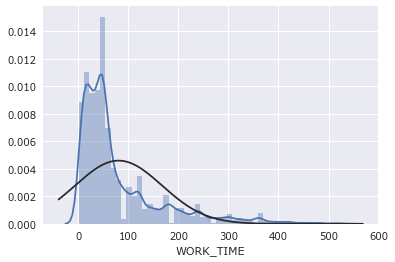

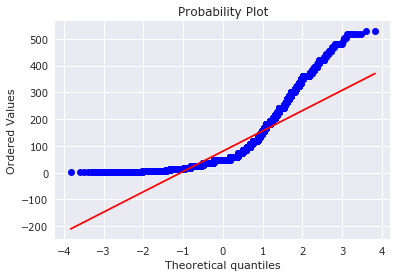

In [75]:
# импортируем библиотеку seaborn, предварительно 
# установив ее в Anaconda Prompt с помощью команды
# conda install -c anaconda seaborn=0.7.1
import seaborn as sns

# импортируем norm и stats
from scipy.stats import norm
from scipy import stats

# строим гистограмму распределения и график
# квантиль-квантиль для переменной WORK_TIME
sns.distplot(train['WORK_TIME'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['WORK_TIME'], plot=plt)

Для распределения, скошенного вправо (положительный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень, кубический корень, свернутый корень и логарифм. Для распределения, скошенного влево (отрицательный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень (константа – x), кубический корень (константа – x) и логарифм (константа – x). Поскольку логарифм нуля, а равно и любого отрицательного числа, неопределен, перед использованием логарифмического преобразования ко всем значениям нужно добавить константу, чтобы сделать их положительными. При использовании корней обычно корень берут от модуля числа (чтобы не вычислять корни отрицательных чисел) и затем учитывают знак числа.

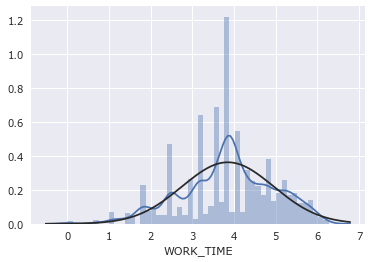

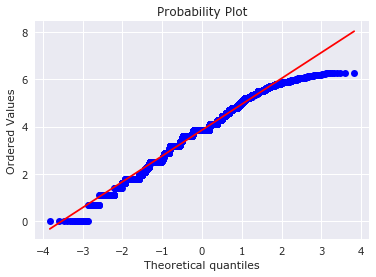

In [76]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной WORK_TIME,
# используем константу a, чтобы не брать
# логарифм нуля
a=0.001
sns.distplot(np.log(train['WORK_TIME']+a), fit=norm);
fig = plt.figure()

res = stats.probplot(np.log(train['WORK_TIME']+a), plot=plt)

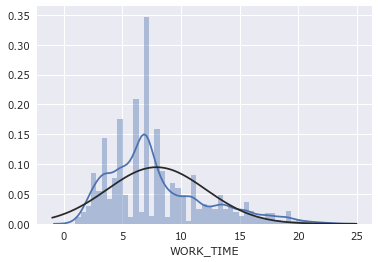

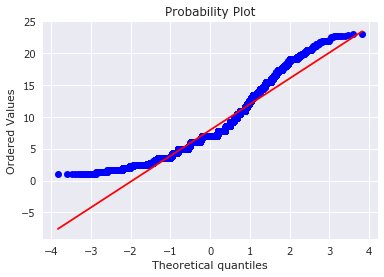

In [77]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# квадратным корнем для переменной WORK_TIME,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['WORK_TIME']) * 
             (train['WORK_TIME'].abs()**(1/2)), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['WORK_TIME']) * 
                     (train['WORK_TIME'].abs()**(1/2)), plot=plt)

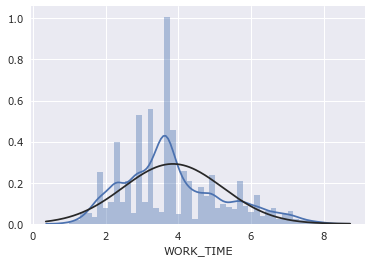

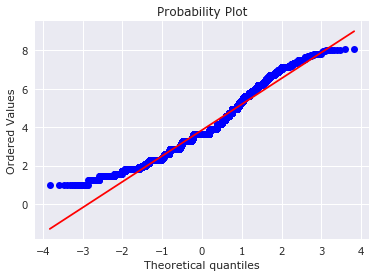

In [78]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# кубическим корнем для переменной WORK_TIME,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['WORK_TIME']) * 
             (train['WORK_TIME'].abs()**(1/3)), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['WORK_TIME']) * 
                     (train['WORK_TIME'].abs()**(1/3)), plot=plt)

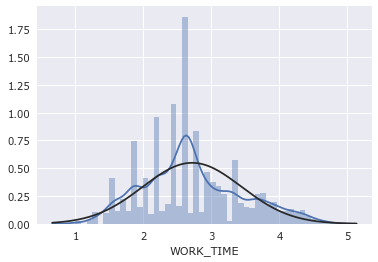

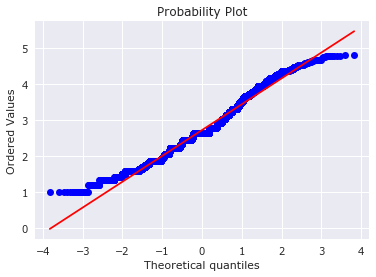

In [79]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# свернутым корнем для переменной WORK_TIME,
# используем модуль, чтобы не вычислять корни 
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['WORK_TIME']) * np.sqrt(np.sqrt(train['WORK_TIME'].abs())), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['WORK_TIME']) * np.sqrt(np.sqrt(train['WORK_TIME'].abs())), plot=plt)

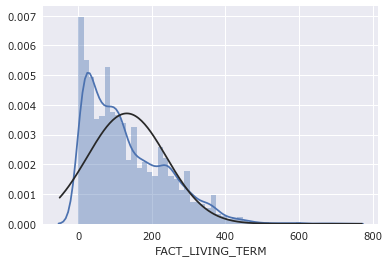

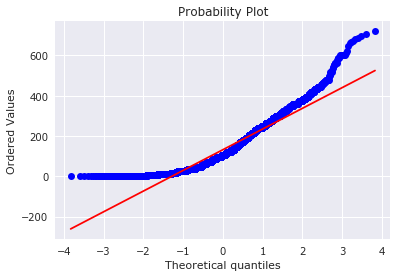

In [80]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной FACT_LIVING_TERM
sns.distplot(train['FACT_LIVING_TERM'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['FACT_LIVING_TERM'], plot=plt)

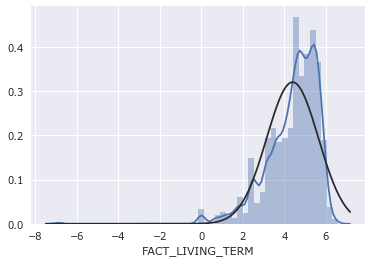

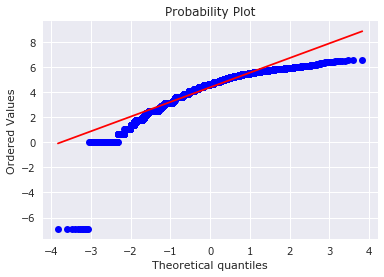

In [81]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной FACT_LIVING_TERM,
# используем константу a, чтобы не брать
# логарифм нуля
a=0.001
sns.distplot(np.log(train['FACT_LIVING_TERM']+a), fit=norm);
fig = plt.figure()

res = stats.probplot(np.log(train['FACT_LIVING_TERM']+a), plot=plt)

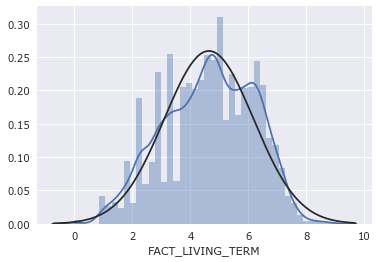

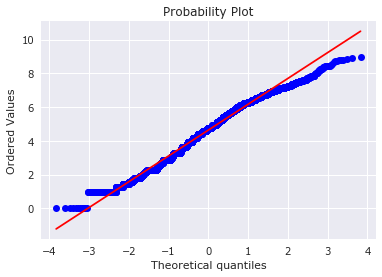

In [82]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# кубическим корнем для переменной FACT_LIVING_TERM,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['FACT_LIVING_TERM']) * 
             (train['FACT_LIVING_TERM'].abs()**(1/3)), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['FACT_LIVING_TERM']) * 
                     (train['FACT_LIVING_TERM'].abs()**(1/3)), plot=plt)

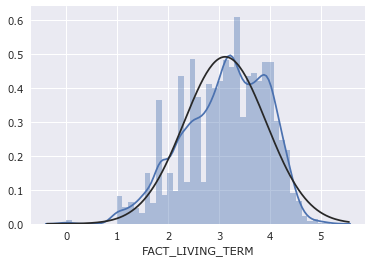

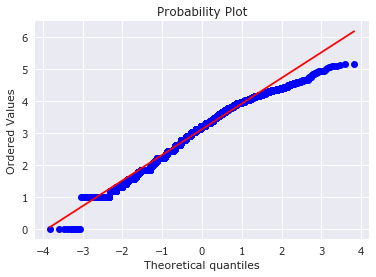

In [83]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# свернутым корнем для переменной FACT_LIVING_TERM, 
# используем модуль, чтобы не вычислять корни 
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['FACT_LIVING_TERM']) * np.sqrt(np.sqrt(train['FACT_LIVING_TERM'].abs())), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['FACT_LIVING_TERM']) * np.sqrt(np.sqrt(train['FACT_LIVING_TERM'].abs())), plot=plt)

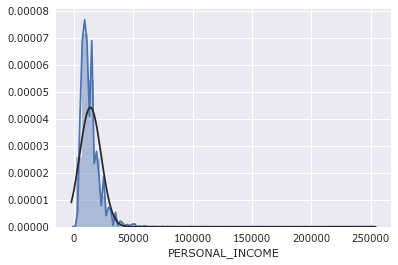

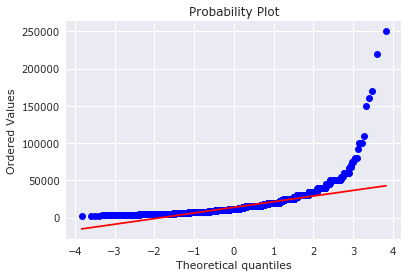

In [84]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной PERSONAL_INCOME
sns.distplot(train['PERSONAL_INCOME'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['PERSONAL_INCOME'], plot=plt)

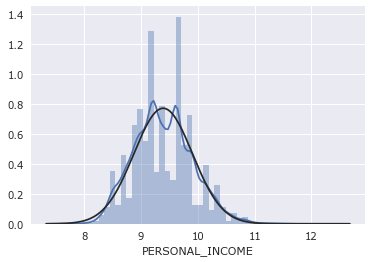

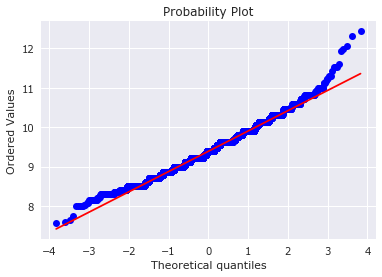

In [85]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной PERSONAL_INCOME,
# используем константу a, чтобы не брать
# логарифм нуля
a=0.001
sns.distplot(np.log(train['PERSONAL_INCOME']+a), fit=norm);
fig = plt.figure()

res = stats.probplot(np.log(train['PERSONAL_INCOME']+a), plot=plt)

# Конструирование новых признаков, не использующее результаты математических вычислений (т.е. которое можно выполнять до/после разбиения на обучение/контроль)

In [86]:
# на основе переменной PERSONAL_INCOME создаем переменную 
# PERSONAL_INCOME_INT, у которой метки категории будут 
# повторять метки категорий FAMILY_INCOME
bins = [-np.inf, 5000, 10000, 20000, 50000, np.inf]
lab = ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 
       'от 20000 до 50000 руб.', 'свыше 50000 руб.']
train['PERSONAL_INCOME_INT']=pd.cut(train['PERSONAL_INCOME'], bins, labels=lab)
test['PERSONAL_INCOME_INT']=pd.cut(test['PERSONAL_INCOME'], bins, labels=lab)

In [87]:
# выводим метки переменной PERSONAL_INCOME_INT
train['PERSONAL_INCOME_INT'].unique()

[от 10000 до 20000 руб., от 20000 до 50000 руб., от 5000 до 10000 руб., до 5000 руб., свыше 50000 руб.]
Categories (5, object): [до 5000 руб. < от 5000 до 10000 руб. < от 10000 до 20000 руб. < от 20000 до 50000 руб. < свыше 50000 руб.]

In [88]:
# создаем переменную PERSONAL_FAMILY_INCOME, которая принимает значение 1, если 
# категория переменной PERSONAL_FAMILY_INCOME совпадает с категорией 
# переменной FAMILY_INCOME, или 0 в противном случае, затем
# преобразовываем в тип object
train['PERSONAL_FAMILY_INCOME'] = np.where(train['PERSONAL_INCOME_INT']==train['FAMILY_INCOME'], 1, 0).astype('object')
test['PERSONAL_FAMILY_INCOME'] = np.where(test['PERSONAL_INCOME_INT']==test['FAMILY_INCOME'], 1, 0).astype('object')

# удаляем переменную PERSONAL_INCOME_INT
train.drop('PERSONAL_INCOME_INT', axis=1, inplace=True)
test.drop('PERSONAL_INCOME_INT', axis=1, inplace=True)

# Биннинг как один из способов конструирования новых признаков, использующий результаты математических вычислений (т.е. можно выполнять только после разбиения на обучение/контроль)

## Описание процедуры

Для количественных независимых переменных биннинг – это разбивка диапазона значений переменной на интервалы (бины). Например, есть переменная Возраст с диапазоном значений от 20 до 70 лет, можно разбить на интервалы: от 18 до 30 лет, от 31 года до 50 лет, от 51 года до 70 лет. В итоге получим категориальную переменную, в которой заданные нами интервалы являются категориями. Для категориальных независимых переменных биннинг – это переназначение (группировка) исходных категорий переменной. Например, есть переменная `Возраст` с категориями от 18 до 25 лет, от 26 до 35 лет, от 36 до 45 лет, от 46 до 55 лет, от 56 до 65 лет. Категории можно укрупнить, из пяти категорий сделать три: от 18 до 35 лет, от 36 до 55 лет, 56 лет и старше. 

Основная причина проведения биннинга – это борьба с нелинейностью при построении скоринговых моделей на основе логистической регрессии. Часто взаимосвязь между непрерывной переменной и событием является нелинейной. Уравнение логистической регрессии, несмотря на то что ее выходное значение подвергается нелинейному преобразованию путем логита, все равно моделирует линейные зависимости между предикторами и зависимой переменной. 

Для иллюстрации можно взять пример с нелинейной зависимостью между возрастом и событием (например, откликом). Допустим, рассчитанный регрессионный коэффициент в уравнении логистической регрессии получился отрицательным. Это значит, что вероятность отклика с возрастом уменьшается. После проведенного биннинга, когда были выделены категории от 18 до 25 лет, от 26 до 35 лет, от 36 до 45 лет и старше 45 лет, оказалось, что зависимость между возрастом и событием нелинейная. Первая (молодые) и последняя (старший возраст) категории склонны к отклику, а промежуточные сегменты, наоборот, не склонны к отклику.

Однако у биннинга имеются и серьезные недостатки. Авторитетный статистик Фрэнк Харрелл приводит ряд причин, по которым не следует проводить биннинг количественных независимых переменных. Основной недостаток – это потеря прогнозной силы переменной в силу снижение ее информативности (вспомним, что наиболее полную информацию несет количественная шкала). Кроме того, в основе биннинга лежит некорректное предположение о том, что зависимость между предиктором и откликом внутри интервалов является монотонной (по мнению Харрелла, это предположение еще менее разумно, чем предположение о линейности). При разбиении всего диапазона значений переменной на интервалы первый и последний интервалы будут очень широкими, потому что плотность распределения в них низкая. После биннинга для вычисления p-значений и доверительных интервалов необходимо использовать сложное имитационное моделирование, потому что переменная после биннинга распределена совершенно ненормально, особенно если для выбора границ диапазонов использовалось значение зависимой переменной, то есть, по сути, информация «из будущего». Нельзя не отметить и очевидный субъективизм категоризации, выражающийся в том, что если нескольким исследователям предложить категоризировать переменную, они выберут разные границы интервалов. 

В силу недостатков, изложенных ниже, биннинг как инструмент борьбы с нелинейностью используется все реже и уступает место преобразованиям на основе ограниченных кубических сплайнов, логарифма, корней второй и третьей степени. В то же время биннинг можно с успехом использовать для создания новых переменных, способных улучшить качество модели.

Самый простой вариант биннинга – разбить количественную переменную на определенное количество интервалов, заданных вручную. 

Обратите внимание, что как и в случае с импутацией статистиками, нельзя создать с помощью биннинга новую переменную на общем наборе данных, а потом разбить набор на обучение и контроль и работать с такой переменной в соответствующей выборке, как с обычной исторической переменной. Это обусловлено тем, что для биннинга используется информация о распределении значений переменной по всему набору данных. В результате получится, что в контрольной выборке мы будем использовать переменную, категории которой были получены, исходя из информации всего набора данных. Здесь важно понять, что с помощью биннинга мы на обучающей выборке получаем правила дискретизации (для количественных переменных) и правила перегруппировки (для категориальных переменных), которые применяются к соответствующей переменной в обучающей и контрольной выборках.

In [89]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной CREDITCAT
bins = [-np.inf, 7292, 9427, 14169, 27449, np.inf]
# осуществляем биннинг переменной CREDIT и записываем
# результаты в новую переменную CREDITCAT
train['CREDITCAT'] = pd.cut(train['CREDIT'], bins)
test['CREDITCAT'] = pd.cut(test['CREDIT'], bins)

## Вычисление WoE и Information Value для оценки прогнозной силы переменных

Однако нам нужно создать не просто новую переменную, а переменную, обладающую высокой прогозной силой. Для задачи бинарной классификации эта прогнозная сила выражается в способности отличать отрицательный класс от положительного (проще говоря, отличать одну категорию зависимой переменной от другой). Поэтому при выполнении биннинга ориентируются на два показателя – WoE и IV, которые позволяют судить об этой способности. 
Давайте построим простую таблицу сопряженности между нашей новой переменной `CREDITCAT` и зависимой переменной `TARGET`.

In [90]:
# строим таблицу сопряженности CREDITCAT * TARGET
biv = pd.crosstab(train['CREDITCAT'], train['TARGET'])
biv

TARGET,0,1
CREDITCAT,,
"(-inf, 7292.0]",2852,326
"(7292.0, 9427.0]",939,140
"(9427.0, 14169.0]",1919,217
"(14169.0, 27449.0]",2805,385
"(27449.0, inf]",911,162


Исходя из этой таблицы, мы можем вычислить «вес» каждой категории. 
WoE (от weight of evidence) или вес категории вычисляется по формуле:

$WoE_i = ln(\frac{F_i^0}{F_i^1})$

где:
- _i_ – категория переменной;
- $ln$ – натуральный логарифм;
- $F_i^0$  –  относительная частота отрицательного класса (класса 0);
- $F_i^1$  –  относительная частота положительного класса (класса 1).

Вычислим вручную WoE для категории `(-inf, 7292.0]`. Относительная частота класса `0` в этой категории равна 2852/(2852+939+1919+2805+911) или 2852/9426=0.303. Относительная частота класса `1` равна 326/(326+140+217+385+162) или 326/1230=0.265. Отношение частот равно 0.303/0.265=1.143. Натуральный логарифм этого отношения ln(1.143)=0.13. WoE измеряет предсказательную силу каждой категории или сгруппированной категории с точки зрения способности отличать класс `0` от класса `1`. Положительные числа обозначают, что отдельно взятая категория выделяет большую пропорцию представителей класса `0`, чем представителей класса `1` (0.303 против 0.265).  Отрицательные числа обозначают, что отдельно взятая категория выделяет большую пропорцию представителей класса `1`, чем представителей класса `0`. 

При работе с WoE, нужно придерживаться нескольких правил:
- пропущенные значения группируются в отдельную категорию;
- каждая категория должна содержать не менее 5% наблюдений; 
- категории не должны содержать нулевого количества событий или не-событий.

WoE, как и процент «плохих», должны в достаточной мере отличаться по группам. Группировка выполняется так, чтобы максимизировать разницу между представителями класса `0` или представителями класса `1`. Одна из целей работы с WoE – выявить и отделить категории, которые хорошо дифференцируют клиентов. Категории со схожими значениями WoE объединяют, потому что такие категории содержат практически одинаковое количество представителей класса `0` и представителей класса `1` и демонстрируют одинаковое «поведение». Несмотря на то, что абсолютное значение WoE важно, разница между WoE групп играет ключевую роль. Чем больше разница между последующими категориями, тем выше прогнозная сила данной переменной.

В идеале WOE непропущенных значений должно быть монотонным, восходя от отрицательных значений к положительным или наоборот, без смены зависимости на обратную. 

Для проверки качества биннинга с помощью WoE строится график значений WoE. Также можно запустить логистическую регрессию с 1 независимой переменной со значениями WoE. Если тангенс угла наклона линии регрессии (попросту говоря, регрессионный коэффициент) не равен 1 или свободный член, определяющий точку пересечения линии регрессии с осью ординат, не равен ln (процент «хороших»/процент «плохих»), то биннинг выполнен некорректно.

Давайте вычислим WOE для каждой категории переменной `CREDITCAT`.

In [91]:
# вычисляем WoE для каждой категории переменной CREDITCAT, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем "a=0.0001", 
# чтобы избежать деления на 0
a= 0.0001
WoE = np.log((1.0*biv[0]/sum(biv[0])+a) / (1.0*biv[1]/sum(biv[1])+a))
WoE

CREDITCAT
(-inf, 7292.0]        0.132
(7292.0, 9427.0]     -0.133
(9427.0, 14169.0]     0.143
(14169.0, 27449.0]   -0.051
(27449.0, inf]       -0.309
dtype: float64

Итак, мы категоризировали переменную так, чтобы она максимально эффективно отличала один класс от другого, и могли бы ее подать на вход модели, но надо убедиться в том, насколько она будет полезна по сравнению с остальными переменными. Самый простой вариант - использовать IV (от information value) или информационное значение. Его можно вычислить для отдельной категории и для всей переменной. Информационное значение для категории вычисляется как разность между относительной частотой класса 0 и относительной частотой класса 1 в данной категории, умноженная на натуральный логарифм отношения этих частот.

$IV_i = {(F_i^0 - F_i^1)}{\ln(\frac{F_i^0}{F_i^1})}$

Вычислим вручную IV для категории `(-inf, 7292.0]`. Разность между относительными частотами равна 0.303-0.265=0.038. Информационное значение равно 0.038 x ln(1.143)= 0.038 x (0.13)=0.005. 
Давайте вычислим IV для каждой категории переменной `CREDITCAT`.

In [92]:
# вычисляем IV для каждой категории переменной CREDITCAT, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем "a=0.0001", 
# чтобы избежать деления на 0
IV_cat=((1.0*biv[0]/sum(biv[0])+a) - 
          (1.0*biv[1]/sum(biv[1])+a))*np.log((1.0*biv[0]/sum(biv[0])+a) 
                                                  / (1.0*biv[1]/sum(biv[1])+a))
IV_cat


CREDITCAT
(-inf, 7292.0]       0.005
(7292.0, 9427.0]     0.002
(9427.0, 14169.0]    0.004
(14169.0, 27449.0]   0.001
(27449.0, inf]       0.011
dtype: float64

Итоговое информационное значение используется для измерения прогнозной силы переменной в целом, для этого информационные значения, вычисленные по каждой категории, складываются.

$IV = \sum_{i = 1}^k(F_i^0 - F_i^1)ln(\frac{F_i^0}{F_i^1})$

Информационное значение всегда является положительной величиной. При интерпретации итоговых значений IV руководствуются правилом: 
- меньше 0.02 – характеристика не обладает предсказательной способностью;
- от 0.02 до 0.1 – слабая предсказательная способность;
- от 0.1 до 0.3 – средняя предсказательная способность;
- 0.3 и выше – высокая предсказательная способность. 
Значения IV более 0.5 обычно вызывают подозрения («слишком хорошо, чтобы быть правдой») и нуждаются в дополнительной проверке.

Давайте вычиcлим итоговое IV для переменной `CREDITCAT`.

In [93]:
# вычисляем итоговое IV для переменной CREDITCAT
IV = sum(((1.0*biv[0]/sum(biv[0])+a) - 
          (1.0*biv[1]/sum(biv[1])+a))*np.log((1.0*biv[0]/sum(biv[0])+a) 
                                                  / (1.0*biv[1]/sum(biv[1])+a)))
IV

0.02236784120809001

В данном случае переменная обладает слабой предсказательной способностью. А теперь давайте ее сравним с остальными переменными. Для этого напишем функцию, которая автоматически вычислит IV по всем переменным. 

In [94]:
# пишем функцию, вычисляющую IV
# по всем предикторам
def auto_IV(df): 
    iv_list = [] 
    a= 0.0001
    df_drop = df.drop("TARGET", axis=1) 
    for var_name in df_drop: 
        biv = pd.crosstab(df[var_name],df["TARGET"])        
        IV = sum(((1.0*biv[0]/sum(biv[0])+a) - (1.0*biv[1]/sum(biv[1])+a))*
                 np.log((1.0*biv[0]/sum(biv[0])+a) / (1.0*biv[1]/sum(biv[1])+a)))
        iv_list.append(IV)
    col_list =list(df_drop)
    results = pd.DataFrame({'Название переменной' : col_list,'IV' : iv_list})
    results['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                             if x <= 0.5 and x > 0.3 else 'Средняя'
                             if x <= 0.3 and x > 0.1 else 'Слабая' 
                             if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                             for x in results['IV']]  # по Наиму Сиддики
    return(results.sort_values(by = 'IV', ascending = False))  

In [95]:
# применяем нашу функцию к обучающему набору
auto_IV(train)

,IV,Название переменной,Полезность
32,2.365,CREDIT,Подозрительно высокая
34,0.867,FST_PAYMENT,Подозрительно высокая
36,0.425,FACT_LIVING_TERM,Сильная
46,0.410,LOAN_AVG_DLQ_AMT,Сильная
47,0.377,LOAN_MAX_DLQ_AMT,Сильная
37,0.292,WORK_TIME,Средняя
14,0.215,PERSONAL_INCOME,Средняя
0,0.192,AGE,Средняя
17,0.151,POSTAL_ADDRESS_PROVINCE,Средняя
16,0.149,FACT_ADDRESS_PROVINCE,Средняя


Мы получаем информацию о наиболее полезных переменных, именно такие переменные имеет смысл подвергнуть биннингу и создать новые переменные. 
Давайте выполним биннинг переменных `FST_PAYMENT` и `AGE`.

Очень удобно делать биннинг с учетом WoE и IV с помощью обработчика **Конечные классы** бесплатной программы **Deductor Studio Academic**.

<img src='../img/Binning1.png'>

В нижеприведенном окне осуществляем биннинг, включив интерактивный режим (кнопка с изображением линейки-треугольника).

<img src='../img/Binning1.png'>



In [96]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной FSTPAYMENTCAT
bins = [-np.inf, 1500, 4995, np.inf]
# осуществляем биннинг переменной FST_PAYMENT и записываем
# результаты в новую переменную FSTPAYMENTCAT
train['FSTPAYMENTCAT'] = pd.cut(train['FST_PAYMENT'], bins)
test['FSTPAYMENTCAT'] = pd.cut(test['FST_PAYMENT'], bins)

In [97]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной AGECAT
bins = [-np.inf, 29, 43, 52, 57, np.inf]
# осуществляем биннинг переменной AGE и записываем
# результаты в новую переменную AGECAT
train['AGECAT'] = pd.cut(train['AGE'], bins)
test['AGECAT'] = pd.cut(test['AGE'], bins)

Очень часто выполняют фильтрацию переменных по итоговым значениям IV, то есть IV используется для удаления наиболее слабых переменных. Однако для отбора наиболее сильных переменных в модель логистической регрессии информационные значения использовать не стоит, потому что выбирать переменные нужно на основании того, как они работают вместе, а не на основании того, как они работают по отдельности. Кроме того, следует помнить, информационное значение зависит от объема категорий (по мере увеличения размеров категорий возрастает и информационное значение). Если WoE сохраняет монотонность как для небольших, так и для крупных категорий, выбирайте более крупные категории.

## Вычисление важностей случайного леса (на основе усредненного уменьшения неоднородности) для оценки прогнозной силы переменных

Для отбора наиболее сильных переменных можно воспользоваться важностями предикторов, вычисляемыми с помощью случайного леса. 
В основе расчета важности переменных лежит критерий уменьшения неоднородности в узлах-потомках дерева. 

В деревьях классификации оценивается уменьшение неоднородности распределения категорий зависимой переменной в узлах-потомках. Однородным узлом является узел, в котором все наблюдения относятся к одной и той же категории зависимой переменной, в то время как узел с максимальной неоднородностью содержит равное количество наблюдений во всех категориях зависимой переменной. Для расчета неоднородности в деревьях классификации используется уже знакомая мера Джини.

В деревьях регрессии оценивается уменьшение разброса значений зависимой переменной относительно определенного среднего значения в узлах-потомках. Здесь уже вместо меры Джини используется внутриузловая дисперсия. Если внутриузловую дисперсию трактовать с точки зрения неоднородности, то абсолютно однородным узлом является узел, в котором все наблюдения имеют одинаковые значения зависимой переменной, в то время как узлом с высоким значением неоднородности (в случае количественной зависимой переменной ограничения максимально возможного значения неоднородности не существует) является узел, включающий наблюдения с сильно различающимися значениями зависимой переменной.

Алгоритм вычисления важности предиктора на основе усредненного уменьшения неоднородности выглядит так:

<dd>1. Для каждого дерева случайного леса вычисляем сумму улучшений или уменьшений неоднородности узлов на всех ветвлениях, связанных с данным предиктором. На рисунке показан пример вычисления улучшения.</dd>


<img src='../img/Improvement.png'>


<dd>2. Итоговую сумму уменьшений неоднородности, полученную по всем деревьям, усредняем путем деления на общее количество деревьев.</dd>

<dd>3. Вышеописанные шаги повторяем для всех остальных предикторов.<dd>

Наиболее важный предиктор – тот, который дает наибольшее усредненное уменьшение неоднородности (для деревьев классификации – уменьшение меры Джини, для деревьев регрессии – уменьшение суммы квадратов остатков). Нетрудно увидеть и недостаток подхода. По сути важность складывается из частоты использования переменной в качестве предиктора разбиения, то есть чаще наиболее важными будут переменные, по которым можем быть рассмотрено больше вариантов разбиения и у них больше шансов стать предиктором разбиения. Поэтому наиболее важными переменными чаще будут переменные с большим количеством уникальных значений, традиционно это количественные переменные. 

In [98]:
# выполняем дамми-кодирование
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'TARGET_1']
y_test = test_dummies.loc[:, 'TARGET_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# TARGET_0 и TARGET_1
train_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
test_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'AGE':'AGECAT_(57.0, inf]']
X_test = test_dummies.loc[:, 'AGE':'AGECAT_(57.0, inf]']
# импортируем класс RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# создаем экземпляр класса RandomForestClassifier
forest=RandomForestClassifier(n_estimators=50, random_state=152, n_jobs=-1)
# подгоняем модель
forest.fit(X_train, y_train)
# cоздаем объект с названиями предикторов
feat_labels = X_train.columns
# cоздаем объект со значениями важностей, вычисленными 
# моделью forest (обратите внимание, речь идет о 
# важностях на основе усредненного уменьшения
# неоднородности)
importances = forest.feature_importances_
# задаем сортировку значений важности и сопоставляем 
# названия предикторов важностям
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 35,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) CREDIT                              0.034740
 2) FST_PAYMENT                         0.031713
 3) FACT_LIVING_TERM                    0.031210
 4) PERSONAL_INCOME                     0.030592
 5) WORK_TIME                           0.030450
 6) AGE                                 0.028839
 7) LOAN_NUM_PAYM                       0.022835
 8) TERM                                0.020317
 9) CHILD_TOTAL                         0.016326
10) DEPENDANTS                          0.014049
11) LOAN_NUM_CLOSED                     0.011537
12) LOAN_MAX_DLQ_AMT                    0.010486
13) LOAN_AVG_DLQ_AMT                    0.010059
14) MARITAL_STATUS_Состою в браке       0.007340
15) EDUCATION_Среднее специальное       0.007265
16) GEN_TITLE_Специалист                0.007208
17) GPF_DOCUMENT_FL_0                   0.007069
18) EDUCATION_Среднее                   0.006992
19) LOAN_NUM_TOTAL                      0.006989
20) FACT_PHONE_FL_0                     0.006828
21) FL_PRESENCE_FL_0

# Выполнение преобразований, исходя из информации гистограмм распределения и графиков квантиль-квантиль

In [99]:
# выполняем логарифмическое преобразование
# переменной PERSONAL_INCOME
train['PERSONAL_INCOME']=np.log(train['PERSONAL_INCOME']+0.01)
test['PERSONAL_INCOME']=np.log(test['PERSONAL_INCOME']+0.01)

# выполняем логарифмическое преобразование
# переменной CREDIT
train['CREDIT']=np.log(train['CREDIT']+0.01)
test['CREDIT']=np.log(test['CREDIT']+0.01)

# выполняем логарифмическое преобразование
# переменной FACT_LIVING_TERM
train['WORK_TIME']=np.log(train['WORK_TIME']+0.01)
test['WORK_TIME']=np.log(test['WORK_TIME']+0.01)

# выполняем преобразование переменной WORK_TIME
# кубическим корнем
train['FACT_LIVING_TERM']=np.sign(train['FACT_LIVING_TERM']) * (train['FACT_LIVING_TERM'].abs()**(1/3))
test['FACT_LIVING_TERM']=np.sign(test['FACT_LIVING_TERM']) * (test['FACT_LIVING_TERM'].abs()**(1/3))

# выполняем логарифмическое преобразование 
# переменной 'LOAN_AVG_DLQ_AMT'
train['LOAN_AVG_DLQ_AMT']=np.log(train['LOAN_AVG_DLQ_AMT']+0.01)
test['LOAN_AVG_DLQ_AMT']=np.log(test['LOAN_AVG_DLQ_AMT']+0.01)

# Конструирование новых признаков, не использующее результаты математических вычислений (т.е. которое можно выполнять до/после разбиения на обучение/контроль)

In [100]:
# создаем переменную CHILD_DEPENDANTS
train['CHILD_DEPENDANTS'] = train['CHILD_TOTAL']/(train['CHILD_TOTAL']+train['DEPENDANTS'])
test['CHILD_DEPENDANTS'] = test['CHILD_TOTAL']/(test['CHILD_TOTAL']+test['DEPENDANTS'])

# если переменная содержит пропуск, то возвращается значение 0, 
# если пропуска нет, то возвращается исходное значение переменной
train['CHILD_DEPENDANTS']=np.where(train['CHILD_DEPENDANTS'].isnull(), 0, train['CHILD_DEPENDANTS'])
test['CHILD_DEPENDANTS']=np.where(test['CHILD_DEPENDANTS'].isnull(), 0, test['CHILD_DEPENDANTS'])

# если бы наша переменная содержала бесконечные значения, то можно было бы воспользоваться
# train['CHILD_DEPENDANTS']=np.where(np.isfinite(train['CHILD_DEPENDANTS']), train['CHILD_DEPENDANTS'], 0)  
# т.е. если переменная CHILD_DEPENDANTS содержит конечное значение, 
# возвращаем исходное значение, если она содержит бесконечное
# значение, возвращаем значение 0

# создаем переменную PAYMENT - сумму ежемесячного взноса
# по кредиту, разделив сумму кредита (CREDIT)
# на срок кредита (TERM)
train['PAYMENT']=np.log((train['CREDIT']/train['TERM'])+0.01)
test['PAYMENT']=np.log((test['CREDIT']/test['TERM'])+0.01)

# создаем переменную PTI - коэффициент долговой нагрузки, 
# разделив сумму ежемесячного взноса по кредиту (PAYMENT)
# на личный доход (PERSONAL_INCOME)
train['PTI'] = train['PAYMENT']/train['PERSONAL_INCOME']
test['PTI'] = test['PAYMENT']/test['PERSONAL_INCOME']

# создаем переменную CLOSED_TO_TOTAL - коэффициент погашения ссуд, 
# разделив количество погашенных ссуд (LOAN_NUM_CLOSED)
# на общее количество ссуд (LOAN_NUM_TOTAL)
train['CLOSED_TO_TOTAL'] = train['LOAN_NUM_CLOSED']/train['LOAN_NUM_TOTAL']
test['CLOSED_TO_TOTAL'] = test['LOAN_NUM_CLOSED']/test['LOAN_NUM_TOTAL']

# создаем переменную PAYM_TO_LOAN– отношение количества 
# платежей (LOAN_NUM_PAYM) к общему количеству ссуд (LOAN_NUM_TOTAL)
train['PAYM_TO_LOAN'] = train['LOAN_NUM_PAYM']/train['LOAN_NUM_TOTAL']
test['PAYM_TO_LOAN'] = test['LOAN_NUM_PAYM']/test['LOAN_NUM_TOTAL']

# создаем переменную DLQ_TO_PAYM – отношение количества просрочек 
# (LOAN_DLQ_NUM) к общему количеству платежей (LOAN_NUM_PAYM)
train['DLQ_TO_PAYM'] = train['LOAN_DLQ_NUM']/train['LOAN_NUM_PAYM']
test['DLQ_TO_PAYM'] = test['LOAN_DLQ_NUM']/test['LOAN_NUM_PAYM']

train['FST_SHARE'] = train['FST_PAYMENT']/(train['FST_PAYMENT']+train['CREDIT'])
test['FST_SHARE'] = test['FST_PAYMENT']/(test['FST_PAYMENT']+test['CREDIT'])
                         
train['DLQ_TIME'] = train['LOAN_MAX_DLQ']/train['LOAN_DLQ_NUM']
test['DLQ_TIME'] = test['LOAN_MAX_DLQ']/test['LOAN_DLQ_NUM']
                     
train['DLQ_TIME'] = np.where(train['DLQ_TIME'].isnull(), 0, train['DLQ_TIME'])
test['DLQ_TIME'] = np.where(test['DLQ_TIME'].isnull(), 0, test['DLQ_TIME'])
                        
train['LOAN_MAX_DLQ_RANGE']=((train['LOAN_MAX_DLQ_AMT']-train['LOAN_AVG_DLQ_AMT'])/train['LOAN_AVG_DLQ_AMT']).abs()
test['LOAN_MAX_DLQ_RANGE']=((test['LOAN_MAX_DLQ_AMT']-test['LOAN_AVG_DLQ_AMT'])/test['LOAN_AVG_DLQ_AMT']).abs()

train['LOAN_MAX_DLQ_RANGE'] = np.where(train['LOAN_MAX_DLQ_RANGE'].isnull(), 0, train['LOAN_MAX_DLQ_RANGE'])
test['LOAN_MAX_DLQ_RANGE'] = np.where(test['LOAN_MAX_DLQ_RANGE'].isnull(), 0, test['LOAN_MAX_DLQ_RANGE'])
              
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 14692 to 6374
Data columns (total 66 columns):
TARGET                        10656 non-null object
AGE                           10656 non-null int64
SOCSTATUS_WORK_FL             10656 non-null object
SOCSTATUS_PENS_FL             10656 non-null object
GENDER                        10656 non-null object
CHILD_TOTAL                   10656 non-null int64
DEPENDANTS                    10656 non-null int64
EDUCATION                     10656 non-null object
MARITAL_STATUS                10656 non-null object
GEN_INDUSTRY                  10656 non-null object
GEN_TITLE                     10656 non-null object
ORG_TP_STATE                  10656 non-null object
ORG_TP_FCAPITAL               10656 non-null object
JOB_DIR                       10656 non-null object
FAMILY_INCOME                 10656 non-null object
PERSONAL_INCOME               10656 non-null float64
REG_ADDRESS_PROVINCE          10656 non-null object
FACT_A

# Дамми-кодирование

In [101]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['TARGET', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'OWN_AUTO', 'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'CREDIT', 'TERM', 'FST_PAYMENT', 'GPF_DOCUMENT_FL', 'FACT_LIVING_TERM', 'WORK_TIME', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'PREVIOUS_CARD_NUM_UTILIZED', 'FACT_TP_FL', 'AUTO_FOR_FL', 'GENDER + FAMILY_INCOME', 'PERSONAL_FAMILY_INCOME', 'CREDITCAT', 'FSTPAYMENTCAT', 'AGECAT', 'CHILD_DEPEN

Переменные после get_dummies:
 ['AGE', 'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'OWN_AUTO', 'CREDIT', 'TERM', 'FST_PAYMENT', 'FACT_LIVING_TERM', 'WORK_TIME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'PREVIOUS_CARD_NUM_UTILIZED', 'CHILD_DEPENDANTS', 'PAYMENT', 'PTI', 'CLOSED_TO_TOTAL', 'PAYM_TO_LOAN', 'DLQ_TO_PAYM', 'FST_SHARE', 'DLQ_TIME', 'LOAN_MAX_DLQ_RANGE', 'TARGET_0', 'TARGET_1', 'SOCSTATUS_WORK_FL_0', 'SOCSTATUS_WORK_FL_1', 'SOCSTATUS_PENS_FL_0', 'SOCSTATUS_PENS_FL_1', 'GENDER_0', 'GENDER_1', 'EDUCATION_Высшее', 'EDUCATION_Неоконченное высшее', 'EDUCATION_Неполное среднее', 'EDUCATION_Среднее', 'EDUCATION_Среднее специальное', 'MARITAL_STATUS_Вдовец/Вдова', 'MARITAL_STATUS_Гражданский брак', 'MARITAL_STATUS_Не состоял в браке', 'MARITAL_STATUS_Разведен(а)', 'MARITAL_STATUS_Состою в браке', 'GEN_INDUSTRY_Банк/Финансы', 'GEN_INDUSTRY_Государственная служба', 'GEN_INDUSTRY_Другие сферы', 'GEN

# Подготовка массивов признаков и массивов меток зависимой переменной

In [102]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'TARGET_1']
y_test = test_dummies.loc[:, 'TARGET_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# TARGET_0 и TARGET_1
train_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
test_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'AGE':'AGECAT_(57.0, inf]']
X_test = test_dummies.loc[:, 'AGE':'AGECAT_(57.0, inf]']

# Построение логистической регрессии

## Стандартизация (приведение шкал всех переменных к одному масштабу)

Помимо нормальности распределения еще одной важнейшей предпосылкой регрессионного анализа является единый масштаб измерения переменных. Давайте отмасштабируем переменные. Самое простое масштабирование подразумевает, что из каждого значения переменной мы вычтем среднее значение и полученный результат разделим на стандартное отклонение:

$$\frac{\Large x_i - mean(x)}{\Large stdev(x)}$$

В итоге мы получаем распределение со средним 0 и стандартным отклонением 1. Именно это и делает класс `StandardScaler`.
Сначала импортируем класс `StandardScaler`, который осуществляет предварительную обработку, а затем создаем его экземпляр.

In [103]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создаем экземпляр класса StandardScaler
scaler = StandardScaler()

Затем с помощью метода `fit` мы подгоняем `scaler` на обучающих данных. В отличие от обычных моделей машинного обучения, при вызове метода `fit` `scaler` работает с данными (`X_train`), а ответы (`y_train`) не используются.

In [104]:
# подгоняем модель
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Чтобы применить преобразование, которое мы только что подогнали, то есть фактически отмасштабировать (scale) обучающие и контрольные данные, мы воспользуемся методом `transform`. Метод `transform` используется в `scikit-learn`, когда модель возвращает новое представление данных. Обратите внимамние, мы всегда применяем одинаковое преобразование к обучающему и тестовому наборам. Это означает, что метод `transform` всегда вычитает среднее значение, вычисленное для обучающего набора, и делит на стандартное отклонение, вычисленное также для обучающего набора. Среднее значение и стандартное отклонение переменной для обучающего набора могут отличаться от среднего значения и стандартного отклонения переменной для тестового набора.

In [105]:
# преобразовываем данные и по отмасштабированным данным
# уже можно будет строить логистическую регрессию
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Построение модели логистической регрессии

In [106]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression

### `Параметры класса LogisticRegression`

- **`penalty`** – задает тип регуляризации. Значение `l1` соответствует l1-регуляризации (лассо), значение `l2` соответствует l2-регуляризации (гребневой регрессии). Оптимизаторы `newton-cg`, `sag` и `lbfgs` поддерживают только l2. По умолчанию используется значение `l2`;
- **`C`** – задает силу регуляризации (чем больше значение, тем меньше сила регуляризации). По умолчанию используется значение `1`;
- **`tol`** – задает допуск сходимости. По умолчанию используется значение 1e-4;
- **`solver`** – задает оптимизатор. Возможные значения: `newton-cg`, `lbfgs`, `liblinear`, `sag`, `saga`. По умолчанию используется значение `liblinear`. При работе с небольшими наборами данными хорошим выбором может быть значение `liblinear`, тогда как при работе с большими наборами данных более быстрыми будут `sag` и `saga`. Оптимизаторы `newton-cg`, `lbfgs` и `sag` работают только с l2-регуляризацией, тогда как `liblinear` и `saga` работают только с l1-регуляризацией;
- **`max_iter`** – задает максимальное количество итераций для оптимизации. По умолчанию используется значение 100;
- **`class_weight`** – задает веса классов, например, `{0:0.67, 1:0.33}`. По умолчанию все классы имеют вес 1.

In [107]:
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score
# строим логистическую регрессию на данных,
# отмасштабированных с помощью StandardScaler
logreg = LogisticRegression().fit(X_train_scaled, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

AUC на обучающей выборке: 0.752
AUC на контрольной выборке: 0.683


## Другие виды стандартизации

`StandardScaler` хорошо работает, когда данные подчиняются нормальному распределению. 
Теперь воспользуемся классом `MinMaxScaler`. Из каждого значения переменной мы вычитаем минимальное значение и полученный результат делим на ширину диапазона (разницу между минимальным и максимальным значениями):

$$\frac{\Large x_i - min(x)}{\Large max(x)-min(x)}$$

В итоге мы сжимаем значения переменных в диапазон от 0 до 1 (или от -1 до 1, если есть отрицательные значения). Этот способ работает лучше в тех случаях, когда `StandardScaler` дает не очень хороший результат. Если распределение не является нормальным или стандартное отклонение является очень маленьким, `MinMaxScaler` сработает лучше.

In [108]:
# применяем MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
scaler2.fit(X_train)
X_train_scaled2 = scaler2.transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

# строим модель логистической регрессии на данных,
# отмасштабированных с помощью MinMaxScaler
logreg = LogisticRegression().fit(X_train_scaled2, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled2)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled2)[:, 1])))

AUC на обучающей выборке: 0.746
AUC на контрольной выборке: 0.688


Однако обратите внимание, что `MinMaxScaler` чувствителен к выбросам, поэтому если данные содержат выбросы, класс `RobustScaler` может дать лучший результат.
Класс `RobustScaler` похож на класс `MinMaxScaler`, но вместо ширины диапазона использует межквартильный размах и поэтому устойчив к выбросам. В основе выполняемого преобразования лежит следующая формула:

$$\frac{\Large x_i - Q_1(x)}{\Large Q_3(x)-Q_1(x)}$$

In [109]:
# применяем RobustScaler
from sklearn.preprocessing import RobustScaler
scaler3 = RobustScaler()
scaler3.fit(X_train)
X_train_scaled3 = scaler3.transform(X_train)
X_test_scaled3 = scaler3.transform(X_test)

# строим модель логистической регрессии на данных,
# отмасштабированных с помощью RobustScaler
logreg = LogisticRegression().fit(X_train_scaled3, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled3)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.747
AUC на контрольной выборке: 0.689


## Настройка регуляризации

Третьей важнейшей предпосылкой построения регрессионной модели является отсутствие взаимосвязи между предикторами.
Наличие сильной корреляционной взаимосвязи между предикторами (на уровне 0,7 и выше) называется мультиколлинеарностью.
Основная цель регрессионного анализа состоит в том, чтобы изолировать взаимосвязь между каждым предиктором и зависимой переменной и вычислить вклад каждого предиктора в прогноз. Регрессионный коэффициент для линейной регрессии показывает изменение значения зависимой переменной, вызванное изменением предиктора на единицу своего измерения, при том, что все остальные предикторы фиксированы. Регрессионный коэффициент для логистической регрессии показывает изменение логарифма шанса события, вызванное изменением предиктора на единицу своего измерения, при том, что все остальные предикторы фиксированы. Идея состоит в том, что вы можете изменить значение только одного предиктора. Однако, когда предикторы коррелированы, это приведет к тому, что изменения одной переменной будут связаны с изменениями другой. Чем сильнее корреляция, тем сложнее изменить одну переменную, не изменив другую. Регрессионной модели становится труднее оценить взаимосвязь между каждым предиктором и зависимой переменной независимо, потому что предикторы имеют тенденцию изменяться в унисон. 

Мультиколлинеарность в модели проявляется в следующем:
- сильный разброс оценок коэффициентов регрессии;
- большие положительные и большие отрицательные оценки коэффициентов регрессии, выше 1,0 по модулю.
- резкое изменение оценок коэффициентов регрессии при добавлении или удалении предиктора;
- неправильный знак перед коэффициентом регрессии (например, объем продаж по уравнению регрессии увеличивается при увеличении цены);
- присутствие в модели большого количества статистически незначимых оценок коэффициентов регрессии.

Для устранения мультиколлинеарности можно увеличить размер выборки (не всегда реально) или снизить разброс оценок коэффициентов регрессии с помощью методов регуляризации (упорядочения) регрессии.
Методы регуляризации сокращают вариабельность оценок коэффициентов регрессии путем сжимания оценок до близких к нулю
значений.

Как и в обычной логистической регрессии, в методах регуляризации максимизируется правдоподобие, но с дополнительным ограничением на оценки коэффициентов регрессии. Вводится штраф за слишком большие оценки коэффициентов регрессии. 
В методе лассо штрафной член представляет собой произведение штрафного коэффициента на сумму модулей коэффициентов регрессии. Метод лассо называют также L1-регуляризацией.

<img src='../img/L1.png'>


В методе гребневой регрессии штрафной член представляет собой произведение штрафного коэффициента на сумму квадратов коэффициентов регрессии. Метод гребневой регрессии называют также L2-регуляризацией.

<img src='../img/L2.png'>


Метод лассо устанавливает некоторые оценки коэффициентов регрессии точно в нуле и тем самым осуществляет отбор переменных. Давайте воспользуемся этим свойством.

In [110]:
# строим логистическую регрессию на данных,
# отмасштабированных с помощью RobustScaler,
# используем l1-регуляризацию (лассо), которая
# устанавливают некоторые оценки коэффициентов 
# регрессии точно в нуле и тем самым осуществляет 
# отбор переменных
logreg = LogisticRegression(C=0.1, penalty='l1').fit(X_train_scaled3, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled3)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))


AUC на обучающей выборке: 0.718
AUC на контрольной выборке: 0.699


## Решетчатый поиск

In [111]:
# импортируем класс StratifiedKFold для выполнения
# статифицированной перекрестной проверки (т.е. в
# каждом блоке соблюдаются исходные пропорции классов)
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold, 10-блочную
# перекрестную проверку со случайным перемешиванием данных
strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg = LogisticRegression(penalty='l1')
# задаем сетку параметров, будем перебирать 
# разные значения штрафа
param_grid = {'C': [0.04, 0.06, 0.08, 0.1, 0.12]}
# создаем экземпляр класса GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, scoring='roc_auc', n_jobs=-1, cv=strat)


### Схема работы решетчатого поиска

<img src='../img/Grid.png'>


In [112]:
# запускаем решетчатый поиск
grid_search.fit(X_train_scaled, y_train)
# проверяем модель со значением параметра, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test_scaled)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.695
Наилучшие значения параметров: {'C': 0.04}
Наилучшее значение AUC: 0.696


# Построение логистической регрессии в библиотеке H2O

In [113]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.121-b13, mixed mode)
  Starting server from C:\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gewissta\AppData\Local\Temp\tmp08583gyz
  JVM stdout: C:\Users\Gewissta\AppData\Local\Temp\tmp08583gyz\h2o_Gewissta_started_from_python.out
  JVM stderr: C:\Users\Gewissta\AppData\Local\Temp\tmp08583gyz\h2o_Gewissta_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,07 secs
H2O cluster version:,3.17.0.4124
H2O cluster version age:,1 month and 4 days
H2O cluster name:,H2O_from_python_Gewissta_9124ia
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [114]:
# библиотека h2o пока не поддерживает кириллицу и чтобы не выводилась абракадабра,
# представим значения категориальных переменных (категории) в виде чисел,
# по-прежнему обрабатывая их как категориальные
for i in ['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 
          'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
          'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 
          'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'GENDER + FAMILY_INCOME']:
    if i in train.columns:
        train[i] = pd.Categorical(train[i])
        train[i] = train[i].cat.codes

for i in ['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 
          'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
          'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 
          'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'GENDER + FAMILY_INCOME']:
    if i in test.columns:
        test[i] = pd.Categorical(test[i])
        test[i] = test[i].cat.codes

In [115]:
# давайте посмотрим, что у нас получилось
train.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,...,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,FACT_TP_FL,AUTO_FOR_FL,GENDER + FAMILY_INCOME,PERSONAL_FAMILY_INCOME,CREDITCAT,FSTPAYMENTCAT,AGECAT,CHILD_DEPENDANTS,PAYMENT,PTI,CLOSED_TO_TOTAL,PAYM_TO_LOAN,DLQ_TO_PAYM,FST_SHARE,DLQ_TIME,LOAN_MAX_DLQ_RANGE
14692,0,31,1,0,0,1,1,0,4,7,6,4,0,7,1,9.616,18,18,18,51,9,1,1,1,1,0,0,0,0,1,...,1,6.109,4.127,1,0,1,2,1,3,0,0,-4.605,0.000,0.000,0,0,1,1,"(7292.0, 9427.0]","(1500.0, 4995.0]","(29.0, 43.0]",0.500,1.113,0.116,0.500,1.500,0.000,0.994,0.000,1.000
6417,0,31,1,0,0,1,1,4,4,17,10,4,0,0,2,9.616,6,6,6,6,6,1,1,1,1,1,1,0,0,0,...,0,3.915,2.891,0,0,1,1,0,4,0,0,-4.605,0.000,0.000,1,0,2,0,"(14169.0, 27449.0]","(1500.0, 4995.0]","(29.0, 43.0]",0.500,0.090,0.009,0.000,4.000,0.000,0.995,0.000,1.000
7119,0,46,1,0,1,3,1,0,4,2,6,1,0,7,1,9.473,42,42,42,38,3,1,1,1,1,1,0,0,0,1,...,1,6.214,4.788,0,0,1,1,0,4,0,0,-4.605,0.000,0.000,1,0,6,1,"(14169.0, 27449.0]","(1500.0, 4995.0]","(43.0, 52.0]",0.750,0.016,0.002,0.000,4.000,0.000,0.996,0.000,1.000
5163,0,57,1,0,0,2,0,3,4,6,5,4,0,0,1,9.473,48,48,48,44,9,1,1,1,1,1,0,1,0,0,...,1,7.343,5.124,0,0,1,1,0,4,0,0,-4.605,0.000,0.000,1,1,1,1,"(7292.0, 9427.0]","(-inf, 1500.0]","(52.0, 57.0]",1.000,0.409,0.043,0.000,4.000,0.000,0.990,0.000,1.000
11682,0,58,1,1,1,2,0,3,4,9,3,2,1,7,1,9.473,24,24,24,21,2,1,1,1,1,1,0,0,0,1,...,1,4.762,3.871,0,0,1,4,3,38,4,1,7.561,1930.470,1.000,1,0,6,1,"(14169.0, 27449.0]","(1500.0, 4995.0]","(57.0, inf]",1.000,-0.195,-0.021,0.750,9.500,0.105,0.996,0.250,254.333


In [116]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
tr = h2o.H2OFrame(train)
valid = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [117]:
# взглянем на обучающий фрейм, обратите внимание,
# сейчас метод .describe() - это метод h2o, а не 
# pandas
tr.describe()

Rows:10656
Cols:66




,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,FACT_TP_FL,AUTO_FOR_FL,GENDER + FAMILY_INCOME,PERSONAL_FAMILY_INCOME,CREDITCAT,FSTPAYMENTCAT,AGECAT,CHILD_DEPENDANTS,PAYMENT,PTI,CLOSED_TO_TOTAL,PAYM_TO_LOAN,DLQ_TO_PAYM,FST_SHARE,DLQ_TIME,LOAN_MAX_DLQ_RANGE
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,int,real,int,real,real,int,int,int,int,int,int,int,int,real,real,int,int,int,int,int,enum,enum,enum,real,real,real,real,real,real,real,real,real
mins,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.575589779749771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.600907459529583,3.0,0.0,0.0,0.0,0.009950330853168092,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-4.605170185988091,0.0,0.0,0.0,0.0,0.0,0.0,,,,0.0,-1.2654857681365164,-0.1469085802487958,0.0,0.5,0.0,0.0,0.0,1.0
mean,0.11542792792792793,40.636355105105196,0.9046546546546547,0.13945195195195195,0.6587837837837838,1.1036974474474501,0.6371058558558562,2.723911411411402,3.21499624624625,10.073292042041995,6.964620870870883,2.02233483483483,0.15972222222222238,5.972316066066085,1.6860923423423457,9.388783623741526,35.66835585585589,35.62321696696679,35.64151651651664,33.0897147147147,4.4815127627627716,0.8416854354354354,0.950168918918919,0.8903903903903904,0.8411223723723724,0.9061561561561562,0.30930930930930933,0.1119557057057057,0.07057057057057058,0.21818693693693694,0.008915165165165165,0.019144144144144143,0.04316816816816817,9.332735357941994,8.113926426426419,3349.7982160285283,0.5914039039039038,4.637834799002583,3.85123627942554,0.6088588588588588,0.054804804804804805,0.9052177177177178,1.3810998498498555,0.7448385885885886,7.864207957957948,0.19510135135135062,0.13016141141141147,-3.0994259866931313,246.5180564939937,0.019144144144144146,0.898460960960961,0.1119557057057057,4.980011261261261,0.3691816816816817,,,,0.4561738991426494,0.26271959679200413,0.02797414505661082,0.43742190851565926,5.160124552312052,0.02456767686347925,0.9134681987676699,0.10662220479928833,32.697765457452114
maxs,1.0,67.0,1.0,1.0,1.0,10.0,6.0,4.0,4.0,23.0,10.0,4.0,2.0,7.0,4.0,12.429216236844384,72.0,72.0,72.0,66.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.69274397508825,36.0,140000.0,1.0,8.962809493114328,6.269115222920853,1.0,1.0,1.0,11.0,11.0,114.0,13.0,8.0,9.81504806537334,18310.0,2.0,1.0,1.0,9.0,1.0,,,,1.0,1.2951050395629988,0.13626730836334836,1.0,39.5,0.8333333333333334,0.9999263700432414,1.0,1864.5028358542768
sigma,0.3195526625510539,11.611818911595636,0.2937051339187052,0.346433785658999,0.4741400710021005,0.9962112327843544,0.8094751150910229,1.5326800557201978,1.1226286274546249,6.773064485597308,3.188077008707722,1.7930645968444652,0.39305954091062434,1.9393631303678684,0.7771356571861308,0.5168513283492893,21.2608477727138,21.269988454008033,21.26327248432523,19.115245420426284,2.8184609292636056,0.3650528306654707,0.21760603890860386,0.3124171933049553,0.3655790873608235,0.29162502941442214,0.4622305819485094,0.315326745850732,0.2561181777414193,0.41303438961354905,0.0940027353203415,0.13703798094318576,0.20324505892803868,0.7213221461684235,4.12668569220898,5137.178729807006,0.49159740174830796,1.53955530653087,1.0987448474656887,0.4880287899635551,0.2276095337604674,0.29292772773135045,0.7818538840401797,0.9

In [118]:
# преобразовываем категориальные переменные, неправильно прочитанные 
# как целочисленные (тип int), в категориальные (тип enum)
for i in ['TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 
          'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE',
          'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE',
          'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM',
          'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 
          'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL', 'HS_PRESENCE_FL',
          'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'DL_DOCUMENT_FL',
          'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL', 
          'FACT_TP_FL', 'AUTO_FOR_FL', 'PERSONAL_FAMILY_INCOME', 'GENDER + FAMILY_INCOME', 
          'CREDITCAT', 'FSTPAYMENTCAT', 'AGECAT']:
    if i in tr.columns:
        tr[i]=tr[i].asfactor()
        
for i in ['TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 
          'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE',
          'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE',
          'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM',
          'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 
          'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL', 'HS_PRESENCE_FL',
          'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'DL_DOCUMENT_FL',
          'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL',
          'FACT_TP_FL', 'AUTO_FOR_FL', 'PERSONAL_FAMILY_INCOME', 'GENDER + FAMILY_INCOME', 
          'CREDITCAT', 'FSTPAYMENTCAT', 'AGECAT']:
    if i in valid.columns:
        valid[i]=valid[i].asfactor()

In [119]:
# снова смотрим обучающий фрейм
tr.describe()

Rows:10656
Cols:66




,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,FACT_TP_FL,AUTO_FOR_FL,GENDER + FAMILY_INCOME,PERSONAL_FAMILY_INCOME,CREDITCAT,FSTPAYMENTCAT,AGECAT,CHILD_DEPENDANTS,PAYMENT,PTI,CLOSED_TO_TOTAL,PAYM_TO_LOAN,DLQ_TO_PAYM,FST_SHARE,DLQ_TIME,LOAN_MAX_DLQ_RANGE
type,enum,int,enum,enum,enum,int,int,enum,enum,enum,enum,enum,enum,enum,enum,real,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,enum,enum,enum,enum,enum,real,int,real,enum,real,real,enum,enum,enum,int,int,int,int,int,real,real,int,enum,enum,enum,enum,enum,enum,enum,real,real,real,real,real,real,real,real,real
mins,,21.0,,,,0.0,0.0,,,,,,,,,7.575589779749771,,,,,,,,,,,,0.0,,,,,,7.600907459529583,3.0,0.0,,0.0,0.009950330853168092,,,,1.0,0.0,1.0,0.0,0.0,-4.605170185988091,0.0,0.0,,,,,,,,0.0,-1.2654857681365164,-0.1469085802487958,0.0,0.5,0.0,0.0,0.0,1.0
mean,,40.636355105105196,,,,1.1036974474474501,0.6371058558558562,,,,,,,,,9.388783623741526,,,,,,,,,,,,0.1119557057057057,,,,,,9.332735357941994,8.113926426426419,3349.7982160285283,,4.637834799002583,3.85123627942554,,,,1.3810998498498555,0.7448385885885886,7.864207957957948,0.19510135135135062,0.13016141141141147,-3.0994259866931313,246.5180564939937,0.019144144144144146,,,,,,,,0.4561738991426494,0.26271959679200413,0.02797414505661082,0.43742190851565926,5.160124552312052,0.02456767686347925,0.9134681987676699,0.10662220479928833,32.697765457452114
maxs,,67.0,,,,10.0,6.0,,,,,,,,,12.429216236844384,,,,,,,,,,,,1.0,,,,,,11.69274397508825,36.0,140000.0,,8.962809493114328,6.269115222920853,,,,11.0,11.0,114.0,13.0,8.0,9.81504806537334,18310.0,2.0,,,,,,,,1.0,1.2951050395629988,0.13626730836334836,1.0,39.5,0.8333333333333334,0.9999263700432414,1.0,1864.5028358542768
sigma,,11.611818911595636,,,,0.9962112327843544,0.8094751150910229,,,,,,,,,0.5168513283492893,,,,,,,,,,,,0.315326745850732,,,,,,0.7213221461684235,4.12668569220898,5137.178729807006,,1.53955530653087,1.0987448474656887,,,,0.7818538840401797,0.9828761996678534,7.951309528660624,0.6814140685752194,0.35811516101302376,3.9728478527822917,833.6814982901625,0.13772114406894734,,,,,,,,0.3718996903526791,0.4479750124912641,0.047736241838075004,0.469819178324581,2.4535864839606196,0.07970636403615355,0.2712131982165418,0.2963466576012123,101.01436145166673
zeros,,0,,,,3494,5815,,,,,,,,,0,,,,,,,,,,,,9463,,,,,,0,0,861,,12,0,,,,0,5492,0,9312,9312,0,9312,10453,,,,,,,,3494,0,0,5492,0,9312,861,9312,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,31.0,1,0,0,1.0,1.0,0,4,7,6,4,0,7,1,9.615806146750792,18,18,18,51,9,1,1,1,1,0,0,0.0,0,1,0,0,0,9.099409928586711,3.0,1600.0,1,6.109114744289606,4.127295662361787,1,0,1,2.0,1.0,3.0,0.0,0.0,-4.605170185988091,0.0,0.0,0,0,1,1,"(7292.0, 9427.0]","(1500.0, 4995.0]","(29.0, 43.0]",0.5,1.1128887739034714,0.11573535873323731,0.5,1.5,0.0,0.994345029354656,0.0,1.0
1,0,31.0,1,0,0,1.0,1.0,4,4,17,10,4,0,0,2,9.615806146750792,6,6,6,6,6,1,1,1,1,1,1,0.0,0,0,0,0,0,9.762327708551636,9.0,2000.0,0,3.914867641168863,2.8909271591878647,0,0,1,1.0,0.0,4.0,0.0,0.0,-4.605170185988091,0.0,0.0,1,0,2,0,"(14169.0, 27449.0]","(1500.0, 4995.0]","(29.0, 43.0]",0.5,0.09048316551864606,0.009409836693642225,0.0,4.0,0.0,0.9951425461737646,0.0,1.0
2,0,46.0,1,0,1,3.0,1.0,0,4,2,6,1,0,7,1,9.472705405674148,42,42,42,38,3,1,1,1,1,1,0,0.0,0,1,0,0,0,

In [120]:
# задаем название зависимой переменной
dependent = 'TARGET'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

In [121]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

### `Параметры класса H2OGeneralizedLinearEstimator`

- **`family`** – вид распределения целевой переменной (аналогичный параметр для градиентного бустинга или глубокого обучения называется `distribution`). Возможные варианты для регрессии: `'gaussian'`, `'poisson'`, `'gamma'`, `'tweedie'`. Для биномиальной классификации (логистической регрессии) нужно задать значение `'binomial'`, а для многоклассовой классификации – `'multinomial'`;
- **`link`** – задает связующую функцию, возможные значения: `'family_default'`, `'identity'`, `'logit'`, `'log'`, `'inverse'`, `'tweedie'`;
- **`alpha`** - задает тип регуляризации. Значение `1` соответствует l1-регуляризации (лассо), значение `0` соответствует l2-регуляризации (гребневой регрессии), промежуточное значение соответствует комбинации штрафов l1 и l2 (эластичной сети);
- **`lambda`** - задает силу регуляризации, значение `0` соответствует отсутствию регуляризации и параметр `alpha` игнорируется;
- **`lambda_search`** - если задан данный параметр, GLM будет вычислять модели по полному пути регуляризации. Путь регуляризации начинается с максимального значения `lambda` и двигается к минимальному значению, уменьшая силу регуляризации на каждом шаге. Значения `lambda` задаются в логарифмической шкале. Возвращенная модель будет иметь коэффициенты, соответствующие "оптимальному" значению `lambda`, выясненному в ходе обучения. Когда задано значение `alpha>0`, перебор значений `lambda` можно использовать для эффективной обработки наборов с большим количеством предикторов, поскольку это позволяет удаляеть бесполезные (шумовые) предикторы и строить модели лишь для небольшого поднабора предикторов. Возможное применение перебора значений `lambda` может быть следующим: запускаете его на наборе с большим количеством предикторов, но при этом ограничиваете количество активных предикторов относительно небольшим значением;
- **`lambda_min_ratio`** – задает минимальное значение `lambda`, заданное как процент от начального (максимального) значения. По умолчанию этот параметр равен `0.0001`. Например, если начальное значение `lambda` составляло `15`, то параметр `lambda_min_ratio` будет равен `0.0015`. Значение `0` никогда не проверяется в ходе автоматического поиска, так что при необходимости такое значение
следует задавать вручную;
- **`nlambdas`** – задает количество проверяемых значений параметра `lambda`. По умолчанию равно `–1`, это означает, что будет проверено 100 значений `lambda` при `alpha = 1` (гребневой регрессии) и 30 значений `lambda` при `alpha = 0` (лассо-регрессии). Можно задать меньшее значение для экономии времени;
- **`max_active_predictors`** - ограничивает количество активных предикторов. Значение по умолчанию равно `–1`, что означает отсутствие ограничений, но можно задать и другое значение для ранней остановки lambda_search при достижении заданного количества ненулевых коэффициентов;
- **`solver`** - задает оптимизатор, возможные значения: `'AUTO'`, `'IRLSM'`, `'L_BFGS'`, `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'`. `'AUTO'` - алгоритм выбирается на основе используемых данных и других параметров. `'IRLSM'` – метод наименьших квадратов с итеративным пересчётом весов (iterative reweighted least qquares method). Оптимальный вариант для относительно небольших объемов данных (до 500 переменных, хотя объем в основном ограничен количеством доступной памяти). Для большего количества переменных можно применять IRLSM при использовании регуляризации с большими значениями `alpha`, чтобы получить большое количество нулевых коэффициентов. `'L_BFGS'` – L означает «ограниченная память» (limited memory), а BFGS – алгоритм Бройдена–Флетчера–Гольдфарба–Шанно (Broyden–Fletcher–Goldfarb–Shanno algorithm). Википедия (https://en.wikipedia.org/wiki/Limitedmemory_BFGS) описывает его как квазиньютоновский метод, начните с изучения этой статьи, если вас интересуют подробности. Этот метод используют вместо IRLSM при работе с большим количеством переменных (реализация в H2O поддерживает работу с сотнями тысяч переменных). `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'` – экспериментальные варианты IRLSM (см. https://en.wikipedia.org/wiki/Coordinate_descent). Хорошо подходят для данных, содержащих до 5000 переменных, и представляющих собой разреженные признаки. Они могут повысить качество, когда данные содержат категориальные переменные с большим количеством уровней. `'COORDINATE_DESCENT'` может дать лучшее качество при использовании перебора значений lambda;
- **`standardize`** - стандартизирует переменные (используется по умолчанию, не рекомендуется отключать);
- **`remove_collinear_columns`** - удаляет коррелирующие столбцы в ходе построения модели (не используется по умолчанию). Параметр следует задавать только в тех случаях, когда регуляризация не используется (`lambda=0`), в противном случае это только приведет к ухудшению качества; 
- **`interactions`** - задает список предикторов для создания парных взаимодействий;
- **`compute_p_values`** - вычисляет p-значения. Можно задать только в тех случаях, когда не используется штраф (`lambda=0`). Рекомендуется задать параметр `remove_collinear_columns`. H2O вернет ошибку, если запрошено вычисление p-значений, при этом есть коррелирующие столбцы, но параметр `remove_collinear_columns` не задан;
- **`training_frame`** - задает обучающий фрейм;
- **`validation_frame`** - задает контрольный фрейм;
- **`nfolds`** - задает количество блоков перекрестной проверки;
- **`keep_cross_validation_predictions`** - задает сохранение прогнозов перекрестной проверки.

In [122]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", seed=1000000)
# обучаем модель
glm_model.train(predictors, dependent, training_frame= tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [123]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1515492259392_1


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09284165871206987
RMSE: 0.30469929227366094
LogLoss: 0.31635702914785074
Null degrees of freedom: 10655
Residual degrees of freedom: 10343
Null deviance: 7623.630033666098
Residual deviance: 6742.201005198995
AIC: 7368.201005198995
AUC: 0.7459693737612106
Gini: 0.4919387475224213
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1698953406659412: 


,0,1,Error,Rate
0,7821.0,1605.0,0.1703,(1605.0/9426.0)
1,631.0,599.0,0.513,(631.0/1230.0)
Total,8452.0,2204.0,0.2098,(2236.0/10656.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1698953,0.3488643,194.0
max f2,0.1157962,0.4833464,248.0
max f0point5,0.2479640,0.3229289,133.0
max accuracy,0.4785859,0.8854167,38.0
max precision,0.7265438,0.6666667,2.0
max recall,0.0095594,1.0,396.0
max specificity,0.7476159,0.9998939,0.0
max absolute_mcc,0.1318760,0.2533481,231.0
max min_per_class_accuracy,0.1194854,0.6810948,244.0
max mean_per_class_accuracy,0.1213850,0.6843101,242.0


Gains/Lift Table: Avg response rate: 11,54 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100413,0.4584161,4.5341235,4.5341235,0.5233645,0.5233645,0.0455285,0.0455285,353.4123547,353.4123547
,2,0.0200826,0.3996268,4.1292911,4.3317073,0.4766355,0.5,0.0414634,0.0869919,312.9291087,333.1707317
,3,0.0300300,0.3603364,2.6971008,3.7902439,0.3113208,0.4375,0.0268293,0.1138211,169.7100782,279.0243902
,4,0.0400713,0.3293938,3.2386597,3.6520249,0.3738318,0.4215457,0.0325203,0.1463415,223.8659676,265.2024904
,5,0.0500188,0.3051308,2.5336401,3.4296069,0.2924528,0.3958724,0.0252033,0.1715447,153.3640129,242.9606919
,6,0.1000375,0.2381975,2.3080767,2.8688418,0.2664165,0.3311445,0.1154472,0.2869919,130.8076694,186.8841807
,7,0.1500563,0.1993988,2.0967739,2.6114858,0.2420263,0.3014384,0.1048780,0.3918699,109.6773898,161.1485837
,8,0.2000751,0.1729126,1.6416602,2.3690294,0.1894934,0.2734522,0.0821138,0.4739837,64.1660184,136.9029424
,9,0.3000188,0.1354405,1.3828925,2.0405227,0.1596244,0.2355333,0.1382114,0.6121951,38.2892477,104.0522746
,10,0.4000563,0.1095397,1.0402599,1.7903984,0.1200750,0.2066620,0.1040650,0.7162602,4.0259919,79.0398380




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.10543390387896007
RMSE: 0.3247058728741445
LogLoss: 0.35711225599628266
Null degrees of freedom: 4566
Residual degrees of freedom: 4254
Null deviance: 3490.733555110778
Residual deviance: 3261.8633462700454
AIC: 3887.8633462700454
AUC: 0.690168458178651
Gini: 0.38033691635730205
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14042170210933352: 


,0,1,Error,Rate
0,2958.0,1027.0,0.2577,(1027.0/3985.0)
1,273.0,309.0,0.4691,(273.0/582.0)
Total,3231.0,1336.0,0.2847,(1300.0/4567.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1404217,0.3222106,226.0
max f2,0.0573963,0.4682698,332.0
max f0point5,0.2530611,0.3024369,130.0
max accuracy,0.5173433,0.8736589,23.0
max precision,0.8776200,1.0,0.0
max recall,0.0140785,1.0,392.0
max specificity,0.8776200,1.0,0.0
max absolute_mcc,0.1404217,0.2002639,226.0
max min_per_class_accuracy,0.1119233,0.6323024,259.0
max mean_per_class_accuracy,0.1291386,0.6382590,239.0


Gains/Lift Table: Avg response rate: 12,74 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100723,0.4698770,3.7529508,3.7529508,0.4782609,0.4782609,0.0378007,0.0378007,275.2950844,275.2950844
,2,0.0201445,0.4129262,2.5588301,3.1558905,0.3260870,0.4021739,0.0257732,0.0635739,155.8830121,215.5890483
,3,0.0299978,0.3667227,2.4413135,2.9211754,0.3111111,0.3722628,0.0240550,0.0876289,144.1313478,192.1175408
,4,0.0400701,0.3387019,2.5588301,2.8300941,0.3260870,0.3606557,0.0257732,0.1134021,155.8830121,183.0094079
,5,0.0501423,0.3156635,2.3882414,2.7413377,0.3043478,0.3493450,0.0240550,0.1374570,138.8241446,174.1337655
,6,0.1000657,0.2461062,2.2026889,2.4726026,0.2807018,0.3150985,0.1099656,0.2474227,120.2688853,147.2602585
,7,0.1499891,0.2028567,1.5143486,2.1536509,0.1929825,0.2744526,0.0756014,0.3230241,51.4348586,115.3650889
,8,0.2001314,0.1765491,1.4392023,1.9746479,0.1834061,0.2516411,0.0721649,0.3951890,43.9202269,97.4647898
,9,0.2999781,0.1374720,1.4283061,1.7927998,0.1820175,0.2284672,0.1426117,0.5378007,42.8306053,79.2799809
,10,0.4000438,0.1111947,0.9615677,1.5848780,0.1225383,0.2019704,0.0962199,0.6340206,-3.8432328,58.4878032



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-01-09 13:04:43,0.000 sec,0,3811.8150168,0.3577154
,2018-01-09 13:04:43,0.465 sec,1,3436.0319268,0.3244112
,2018-01-09 13:04:43,0.579 sec,2,3376.4398323,0.3188673
,2018-01-09 13:04:43,0.653 sec,3,3376.5183711,0.3187836
,2018-01-09 13:04:43,0.730 sec,4,3376.5035377,0.3187830
,2018-01-09 13:04:43,0.879 sec,5,3371.1987767,0.3184887
,2018-01-09 13:04:43,0.955 sec,6,3371.1005026,0.3184873


In [124]:
glm_model2 = H2OGeneralizedLinearEstimator(family= "binomial", seed=1000000, lambda_search=True)
glm_model2.train(predictors, dependent, training_frame= tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [125]:
glm_model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1515492259392_4


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09476515506301943
RMSE: 0.307839495619096
LogLoss: 0.3237939896828164
Null degrees of freedom: 10655
Residual degrees of freedom: 10530
Null deviance: 7623.630033666098
Residual deviance: 6900.697508120183
AIC: 7152.697508120183
AUC: 0.7280254925400941
Gini: 0.45605098508018815
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16476947094416985: 


,0,1,Error,Rate
0,7815.0,1611.0,0.1709,(1611.0/9426.0)
1,656.0,574.0,0.5333,(656.0/1230.0)
Total,8471.0,2185.0,0.2127,(2267.0/10656.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1647695,0.3361640,186.0
max f2,0.0977683,0.4717260,267.0
max f0point5,0.1978361,0.2980518,155.0
max accuracy,0.6244157,0.8846659,2.0
max precision,0.6244157,0.6666667,2.0
max recall,0.0136740,1.0,396.0
max specificity,0.6918428,0.9998939,0.0
max absolute_mcc,0.1647695,0.2340763,186.0
max min_per_class_accuracy,0.1199308,0.6692128,238.0
max mean_per_class_accuracy,0.1172575,0.6726209,242.0


Gains/Lift Table: Avg response rate: 11,54 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100413,0.3960585,3.5625256,3.5625256,0.4112150,0.4112150,0.0357724,0.0357724,256.2525644,256.2525644
,2,0.0200826,0.3419115,3.7244586,3.6434921,0.4299065,0.4205607,0.0373984,0.0731707,272.4458628,264.3492136
,3,0.0300300,0.3150605,2.6971008,3.33,0.3113208,0.384375,0.0268293,0.1,169.7100782,233.0
,4,0.0400713,0.2918267,2.5909277,3.1447992,0.2990654,0.3629977,0.0260163,0.1260163,159.0927741,214.4799223
,5,0.0500188,0.2736702,2.2067188,2.9582391,0.2547170,0.3414634,0.0219512,0.1479675,120.6718822,195.8239143
,6,0.1000375,0.2176407,2.2430604,2.6006498,0.2589118,0.3001876,0.1121951,0.2601626,124.3060449,160.0649796
,7,0.1500563,0.1865746,2.0317577,2.4110191,0.2345216,0.2782989,0.1016260,0.3617886,103.1757653,141.1019082
,8,0.2000751,0.1662905,1.8692170,2.2755686,0.2157598,0.2626642,0.0934959,0.4552846,86.9217041,127.5568572
,9,0.3000188,0.1353480,1.2852765,1.9456777,0.1483568,0.2245855,0.1284553,0.5837398,28.5276537,94.5677731
,10,0.4000563,0.1135516,1.1459113,1.7456892,0.1322702,0.2015013,0.1146341,0.6983740,14.5911317,74.5689226




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.10461998590546963
RMSE: 0.3234501289309832
LogLoss: 0.35247452273373064
Null degrees of freedom: 4566
Residual degrees of freedom: 4441
Null deviance: 3490.733555110778
Residual deviance: 3219.5022906498957
AIC: 3471.5022906498957
AUC: 0.7012247388186801
Gini: 0.40244947763736016
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12654169822274533: 


,0,1,Error,Rate
0,2748.0,1237.0,0.3104,(1237.0/3985.0)
1,225.0,357.0,0.3866,(225.0/582.0)
Total,2973.0,1594.0,0.3201,(1462.0/4567.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1265417,0.328125,236.0
max f2,0.0720410,0.4780506,315.0
max f0point5,0.2342465,0.2910174,127.0
max accuracy,0.5562151,0.8734399,9.0
max precision,0.5562151,0.7,9.0
max recall,0.0260740,1.0,381.0
max specificity,0.7629717,0.9997491,0.0
max absolute_mcc,0.1265417,0.2119627,236.0
max min_per_class_accuracy,0.1168052,0.6426600,249.0
max mean_per_class_accuracy,0.1265417,0.6514940,236.0


Gains/Lift Table: Avg response rate: 12,74 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100723,0.4173635,2.9000075,2.9000075,0.3695652,0.3695652,0.0292096,0.0292096,190.0007470,190.0007470
,2,0.0201445,0.3515151,3.0705961,2.9853018,0.3913043,0.3804348,0.0309278,0.0601375,207.0596145,198.5301808
,3,0.0299978,0.3174882,3.1388316,3.0357313,0.4,0.3868613,0.0309278,0.0910653,213.8831615,203.5731307
,4,0.0400701,0.2960939,2.3882414,2.8729743,0.3043478,0.3661202,0.0240550,0.1151203,138.8241446,187.2974293
,5,0.0501423,0.2742005,2.0470641,2.7070709,0.2608696,0.3449782,0.0206186,0.1357388,104.7064097,170.7070934
,6,0.1000657,0.2226583,1.9617698,2.3352358,0.25,0.2975930,0.0979381,0.2336770,96.1769759,133.5235775
,7,0.1499891,0.1891441,1.8241017,2.1651065,0.2324561,0.2759124,0.0910653,0.3247423,82.4101706,116.5106479
,8,0.2001314,0.1681807,1.6105359,2.0261605,0.2052402,0.2582057,0.0807560,0.4054983,61.0535872,102.6160452
,9,0.2999781,0.1376978,1.3250550,1.7927998,0.1688596,0.2284672,0.1323024,0.5378007,32.5055013,79.2799809
,10,0.4000438,0.1154497,1.1332762,1.6278287,0.1444201,0.2074439,0.1134021,0.6512027,13.3276185,62.7828656



Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2018-01-09 13:04:48,0.000 sec,1,",65E-1",1,0.7154307,0.7643384
,2018-01-09 13:04:48,0.110 sec,3,",59E-1",3,0.7130927,0.7616137
,2018-01-09 13:04:48,0.176 sec,5,",54E-1",4,0.7106566,0.7587326
,2018-01-09 13:04:49,0.295 sec,7,",49E-1",5,0.7076236,0.7551630
,2018-01-09 13:04:49,0.342 sec,9,",45E-1",8,0.7035956,0.7508736
---,---,---,---,---,---,---,---
,2018-01-09 13:04:51,2.648 sec,60,",9E-3",137,0.6466009,0.7049730
,2018-01-09 13:04:51,2.705 sec,61,",82E-3",146,0.6456271,0.7050318
,2018-01-09 13:04:51,2.768 sec,62,",74E-3",155,0.6446984,0.7051195
,2018-01-09 13:04:51,2.821 sec,63,",68E-3",160,0.6438097,0.7052531



See the whole table with table.as_data_frame()


In [126]:
# импортируем класс H2OGridSearch для выполнения решетчатого поиска
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку параметров, будем перебирать разные значения alpha,
# alpha определяет тип регуляризации: значение 1 соответствует 
# l1-регуляризации (лассо), значение 0 соответствует l2-регуляризации 
# (гребневой регрессии), промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha': [0.02, 0.04, 0.06, 0.08, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda - силы регуляризации,
# interactions задает список предикторов для
# парных взаимодействий)
gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', lambda_search=True,
                                                        interactions=['GENDER', 'EDUCATION',
                                                                      'MARITAL_STATUS', 'FAMILY_INCOME',
                                                                      'GEN_TITLE', 'GEN_INDUSTRY', 'REGION_NM']),
                           grid_id="gridresults", hyper_params=hyper_parameters)
# подгоняем модели решетчатого поиска
gridsearch.train(predictors, dependent, training_frame=tr, validation_frame=valid, seed=1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [127]:
# выводим результаты решетчатого поиска
gridsearch.show()

      alpha            model_ids              logloss
0    [0.04]  gridresults_model_1   0.3517126062762696
1    [0.06]  gridresults_model_2  0.35172573268289314
2    [0.08]  gridresults_model_3   0.3517373783823514
3    [0.02]  gridresults_model_0   0.3523359703450465
4     [1.0]  gridresults_model_4  0.35253211378614824


In [128]:
# сортируем результаты решетчатого поиска
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by="auc", decreasing=True)
gridperf

      alpha            model_ids                 auc
0    [0.04]  gridresults_model_1  0.7039432666313107
1    [0.06]  gridresults_model_2  0.7039003652011193
2    [0.08]  gridresults_model_3  0.7036817619337119
3    [0.02]  gridresults_model_0  0.7032214877957288
4     [1.0]  gridresults_model_4  0.7015591112720814
